In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize, LogNorm, ListedColormap
import sys
sys.path.append('../')
sys.path.append('../pywrdrb/')

import plotting
from plotting.plotting_functions import *


### compare flows at gages downstream of reservoirs

In [2]:
### directories
from utils.directories import input_dir, fig_dir, output_dir


# Constants
cms_to_mgd = 22.82
cm_to_mg = 264.17/1e6
cfs_to_mgd = 0.0283 * 22824465.32 / 1e6


### list of reservoirs and major flow points to compare across models
reservoir_list = ['cannonsville', 'pepacton', 'neversink', 'wallenpaupack', 'prompton', 'shoholaMarsh', \
                   'mongaupeCombined', 'beltzvilleCombined', 'fewalter', 'merrillCreek', 'hopatcong', 'nockamixon', \
                   'assunpink', 'ontelaunee', 'stillCreek', 'blueMarsh', 'greenLane']
reservoir_list_nyc = reservoir_list[:3]

majorflow_list = ['delLordville', 'delMontague', 'delTrenton', 'outletAssunpink', 'outletSchuylkill',
                  '01425000', '01417000', '01436000', '01433500', '01449800',
                  '01447800', '01463620', '01470960']

reservoir_link_pairs = {'cannonsville': '01425000',
                           'pepacton': '01417000',
                           'neversink': '01436000',
                           'mongaupeCombined': '01433500',
                           'beltzvilleCombined': '01449800',
                           'fewalter': '01447800',
                           'assunpink': '01463620',
                           'blueMarsh': '01470960'}




In [3]:
start_date = '1984-01-01'
end_date = '2016-12-31'

    
## Load data    
# Load Pywr-DRB simulation models
print('Retrieving simulation data.')
pywr_models = ['obs_pub_nhmv10_NYCScaled','obs_pub_nwmv21_NYCScaled', 'nhmv10', 'nwmv21', 'WEAP_29June2023_gridmet']

reservoir_downstream_gages = {}
major_flows = {}
datetime_index = None

for model in pywr_models:
    print(model)
    reservoir_downstream_gages[f'pywr_{model}'], datetime_index = get_pywr_results(output_dir, model, 'reservoir_downstream_gage', datetime_index=datetime_index)
    reservoir_downstream_gages[f'pywr_{model}'] = reservoir_downstream_gages[f'pywr_{model}'].loc[start_date:end_date,:]
    
    major_flows[f'pywr_{model}'], datetime_index = get_pywr_results(output_dir, model, 'major_flow', datetime_index=datetime_index)
    major_flows[f'pywr_{model}'] = major_flows[f'pywr_{model}'].loc[start_date:end_date,:]
pywr_models = [f'pywr_{m}' for m in pywr_models]

# Load base (non-pywr) models
base_models = ['obs', 'obs_pub_nhmv10_NYCScaled','obs_pub_nwmv21_NYCScaled', 'nhmv10', 'nwmv21', 'WEAP_29June2023_gridmet']

datetime_index = list(reservoir_downstream_gages.values())[0].index
for model in base_models:
    print(model)
    reservoir_downstream_gages[model] = get_base_results(input_dir, model, datetime_index, 'reservoir_downstream_gage').loc[start_date:end_date,:]
    major_flows[model] = get_base_results(input_dir, model, datetime_index, 'major_flow').loc[start_date:end_date,:]

# Verify that all datasets have same datetime index
for r in reservoir_downstream_gages.values():
    assert ((r.index == datetime_index).mean() == 1)
for r in major_flows.values():
    assert ((r.index == datetime_index).mean() == 1)
print(f'Successfully loaded {len(base_models)} base model results & {len(pywr_models)} pywr model results')

Retrieving simulation data.
obs_pub_nhmv10_NYCScaled
obs_pub_nwmv21_NYCScaled
nhmv10
nwmv21
WEAP_29June2023_gridmet
obs
obs_pub_nhmv10_NYCScaled
obs_pub_nwmv21_NYCScaled
nhmv10
nwmv21
WEAP_29June2023_gridmet
Successfully loaded 6 base model results & 5 pywr model results


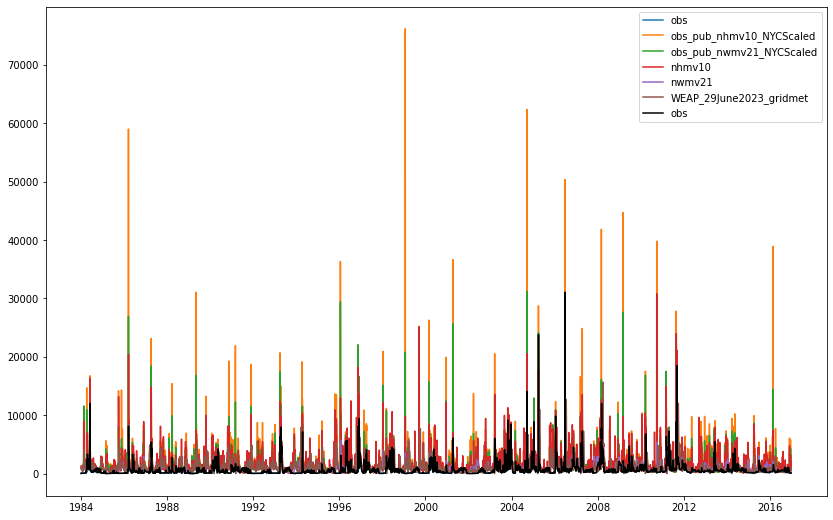

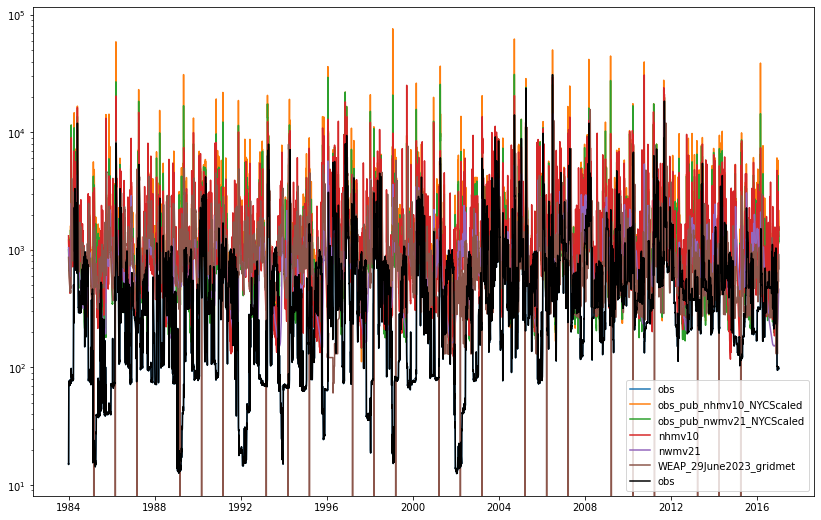

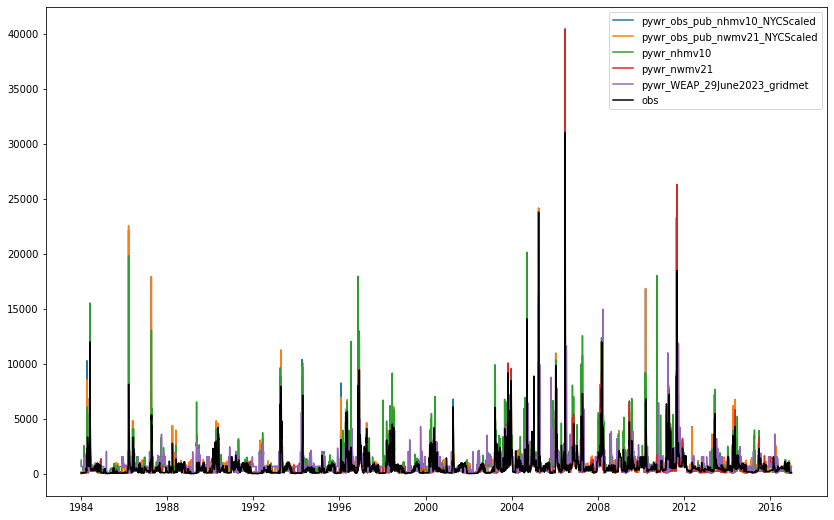

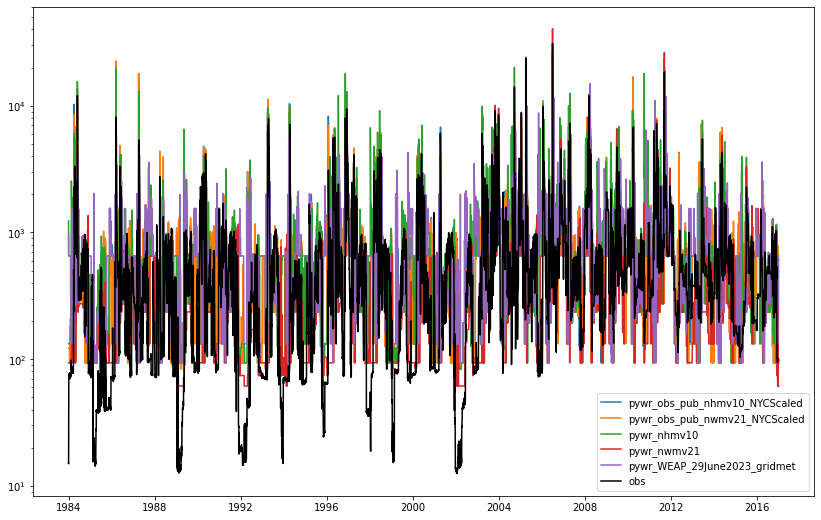

In [4]:
reservoirs = ['pepacton','cannonsville','neversink']
plt.figure(figsize=(14,9))
for model in base_models:
    flows = reservoir_downstream_gages[model]
    plt.plot(flows['pepacton']+flows['cannonsville']+flows['neversink'], label=model)
flows = reservoir_downstream_gages['obs']
plt.plot(flows['pepacton']+flows['cannonsville']+flows['neversink'], label='obs', c='k')
plt.legend()

plt.figure(figsize=(14,9))
for model in base_models:
    flows = reservoir_downstream_gages[model]
    plt.plot(flows['pepacton']+flows['cannonsville']+flows['neversink'], label=model)
flows = reservoir_downstream_gages['obs']
plt.plot(flows['pepacton']+flows['cannonsville']+flows['neversink'], label='obs', c='k')
plt.yscale('log')
plt.legend()

plt.figure(figsize=(14,9))
for model in pywr_models:
    flows = reservoir_downstream_gages[model]
    plt.plot(flows['pepacton']+flows['cannonsville']+flows['neversink'], label=model)
flows = reservoir_downstream_gages['obs']
plt.plot(flows['pepacton']+flows['cannonsville']+flows['neversink'], label='obs', c='k')
plt.legend()

plt.figure(figsize=(14,9))
for model in pywr_models:
    flows = reservoir_downstream_gages[model]
    plt.plot(flows['pepacton']+flows['cannonsville']+flows['neversink'], label=model)
flows = reservoir_downstream_gages['obs']
plt.plot(flows['pepacton']+flows['cannonsville']+flows['neversink'], label='obs', c='k')
plt.yscale('log')
plt.legend()

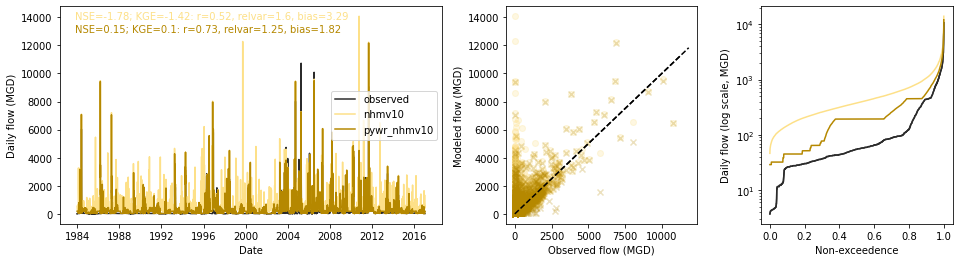

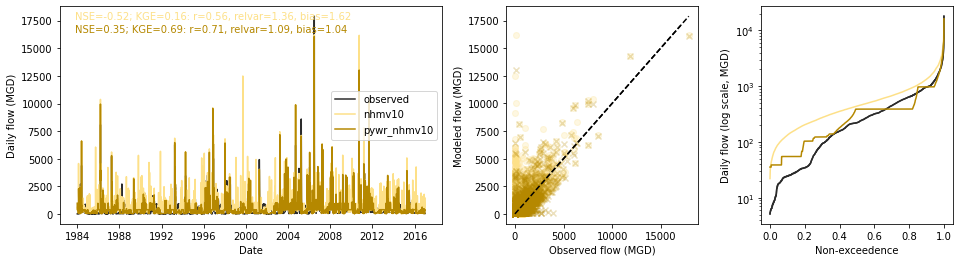

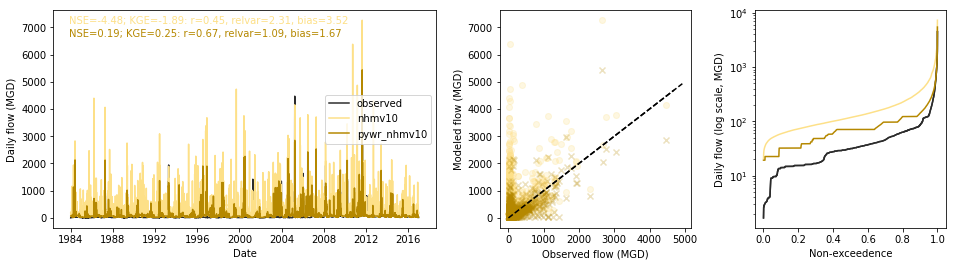

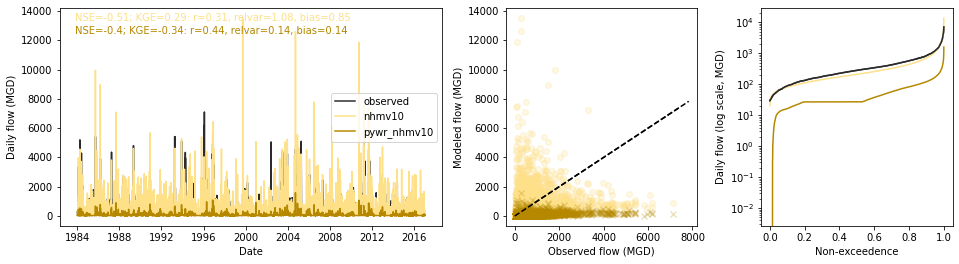

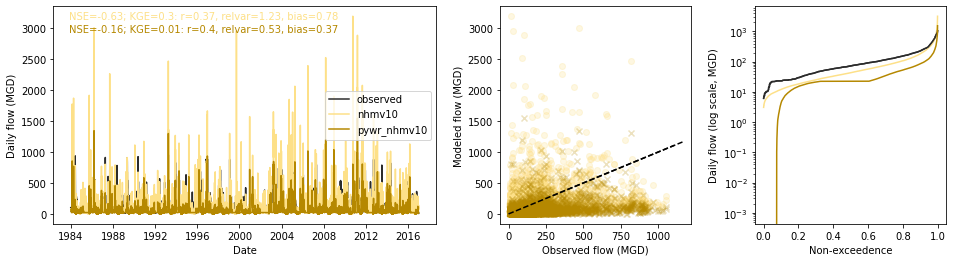

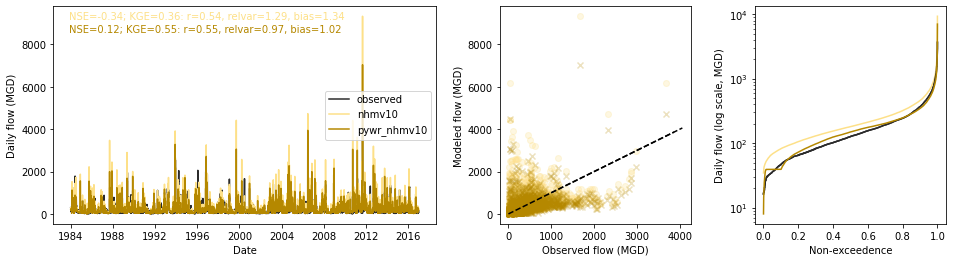

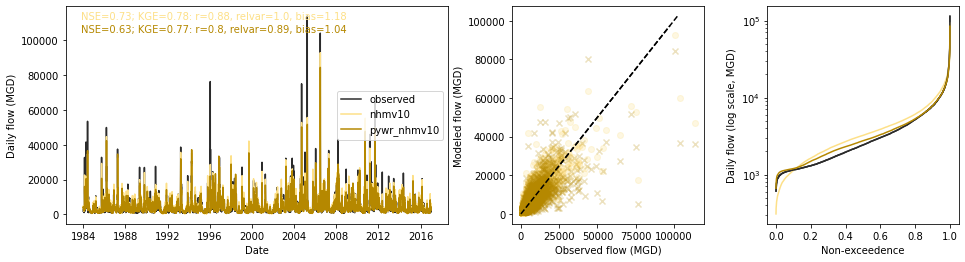

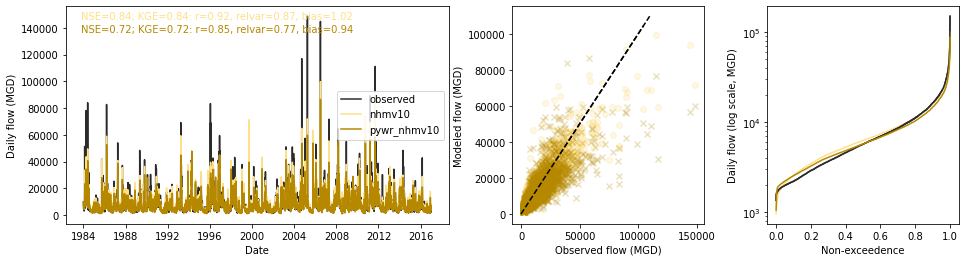

In [5]:
### flow comparison downstream of reservoirs - nhm
plot_3part_flows(reservoir_downstream_gages, ['nhmv10', 'pywr_nhmv10'], 'pepacton', save_fig=False)
plot_3part_flows(reservoir_downstream_gages, ['nhmv10', 'pywr_nhmv10'], 'cannonsville', save_fig=False)
plot_3part_flows(reservoir_downstream_gages, ['nhmv10', 'pywr_nhmv10'], 'neversink', save_fig=False)
plot_3part_flows(reservoir_downstream_gages, ['nhmv10', 'pywr_nhmv10'], 'fewalter', save_fig=False)
plot_3part_flows(reservoir_downstream_gages, ['nhmv10', 'pywr_nhmv10'], 'beltzvilleCombined', save_fig=False)
plot_3part_flows(reservoir_downstream_gages, ['nhmv10', 'pywr_nhmv10'], 'blueMarsh', save_fig=False)
plot_3part_flows(major_flows, ['nhmv10', 'pywr_nhmv10'], 'delMontague', save_fig=False)
plot_3part_flows(major_flows, ['nhmv10', 'pywr_nhmv10'], 'delTrenton', save_fig=False)

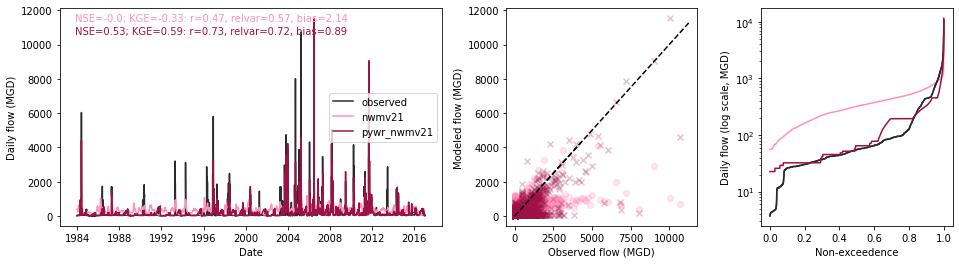

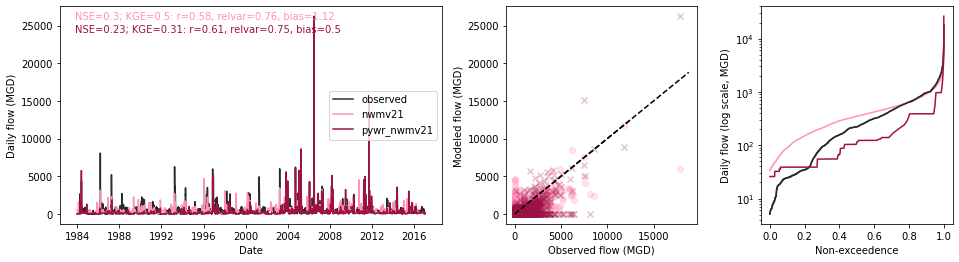

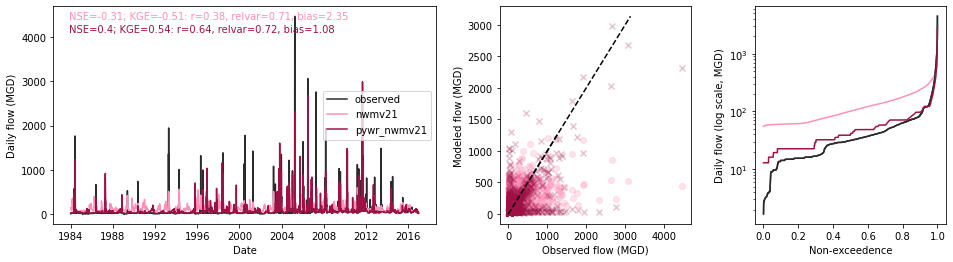

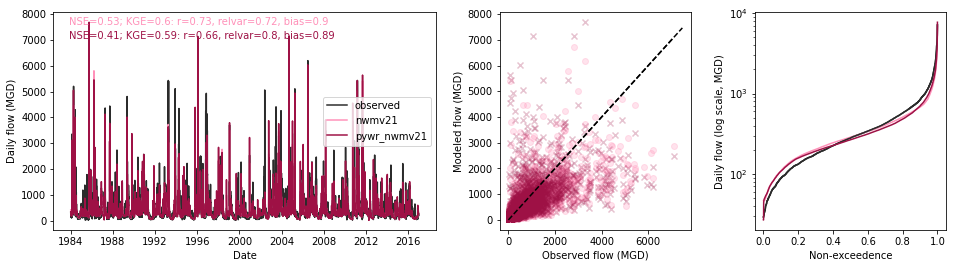

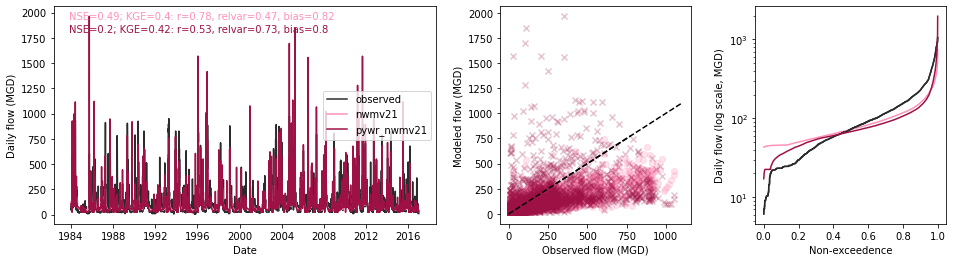

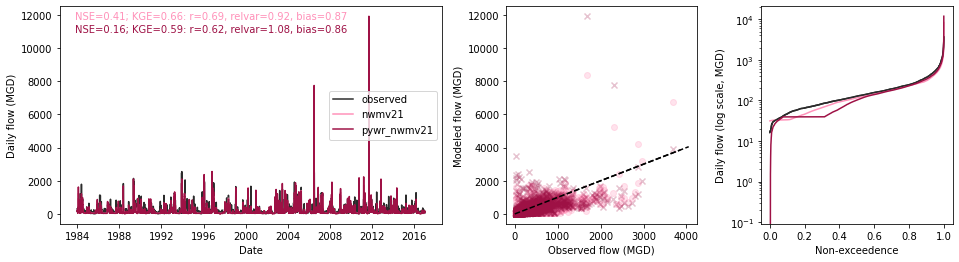

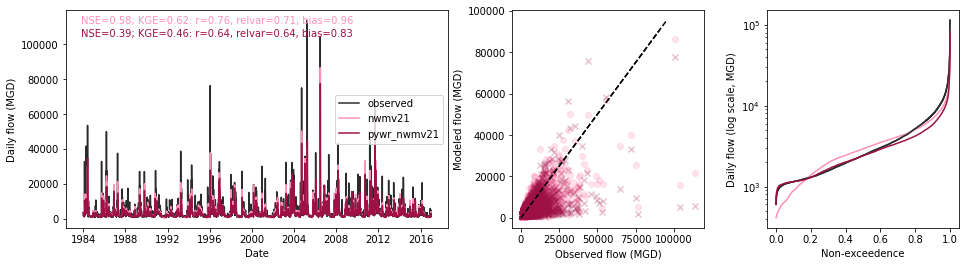

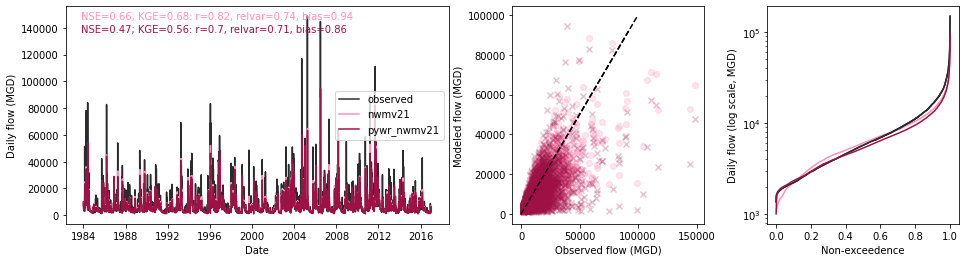

In [6]:
### flow comparison downstream of reservoirs - nwm
plot_3part_flows(reservoir_downstream_gages, ['nwmv21', 'pywr_nwmv21'], 'pepacton', save_fig=False)
plot_3part_flows(reservoir_downstream_gages, ['nwmv21', 'pywr_nwmv21'], 'cannonsville', save_fig=False)
plot_3part_flows(reservoir_downstream_gages, ['nwmv21', 'pywr_nwmv21'], 'neversink', save_fig=False)
plot_3part_flows(reservoir_downstream_gages, ['nwmv21', 'pywr_nwmv21'], 'fewalter', save_fig=False)
plot_3part_flows(reservoir_downstream_gages, ['nwmv21', 'pywr_nwmv21'], 'beltzvilleCombined', save_fig=False)
plot_3part_flows(reservoir_downstream_gages, ['nwmv21', 'pywr_nwmv21'], 'blueMarsh', save_fig=False)
plot_3part_flows(major_flows, ['nwmv21', 'pywr_nwmv21'], 'delMontague', save_fig=False)
plot_3part_flows(major_flows, ['nwmv21', 'pywr_nwmv21'], 'delTrenton', save_fig=False) 

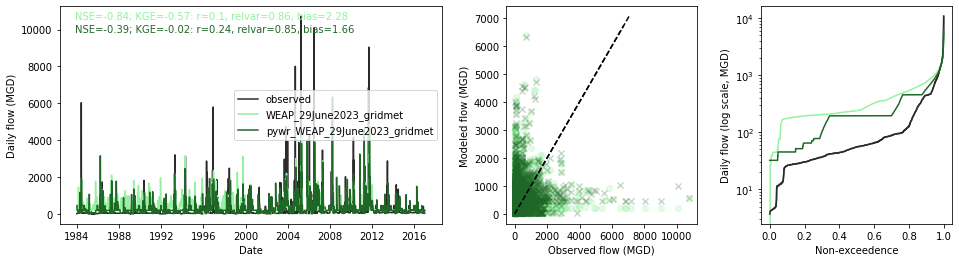

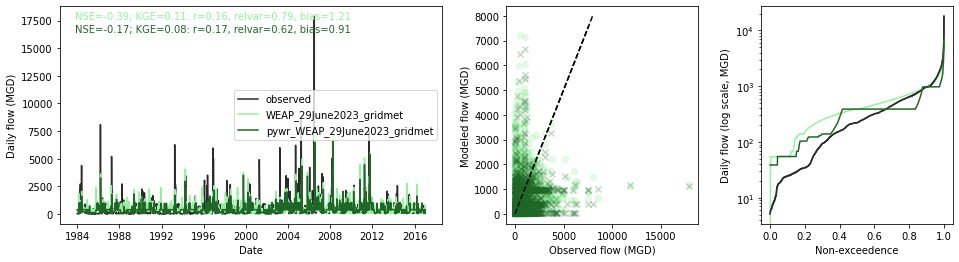

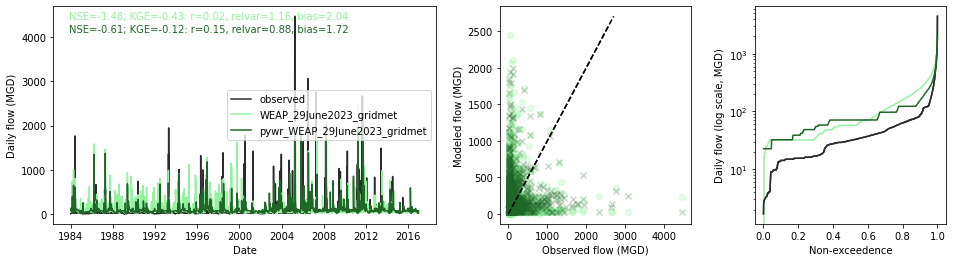

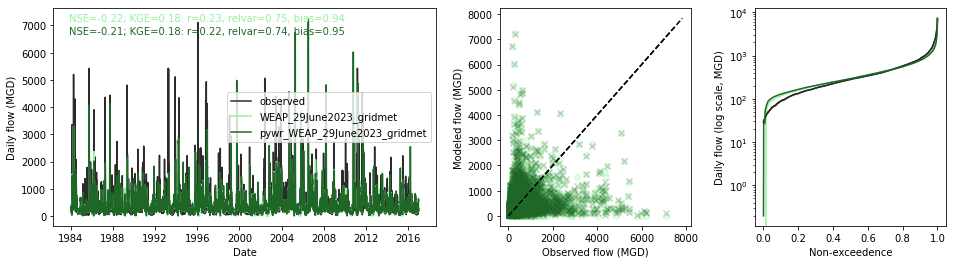

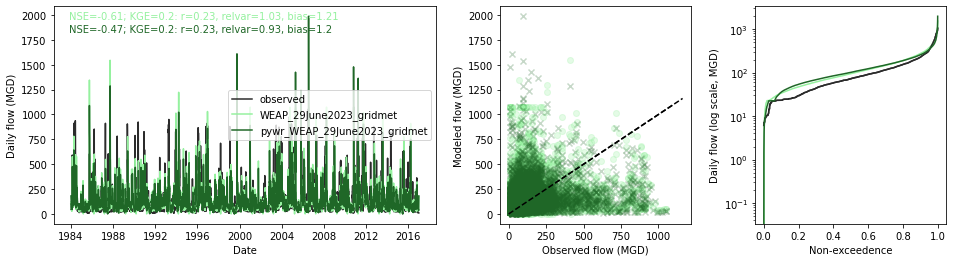

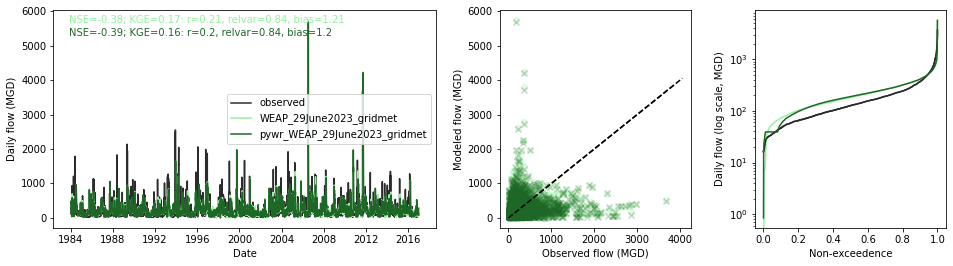

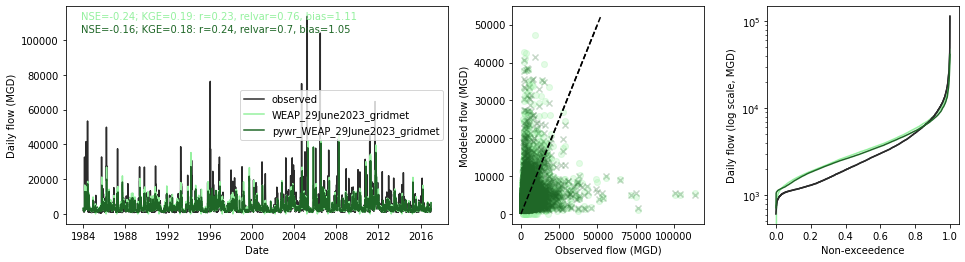

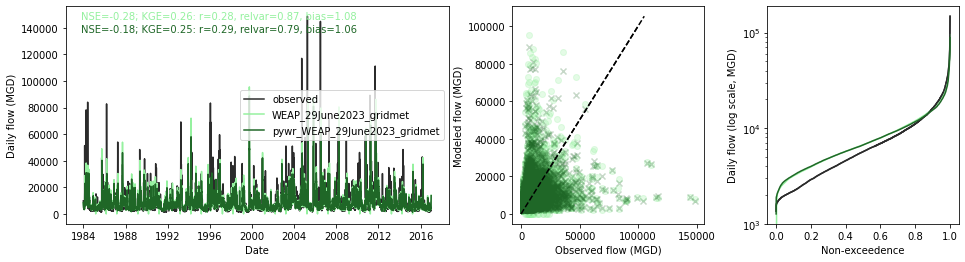

In [7]:
### flow comparison downstream of reservoirs - weap
plot_3part_flows(reservoir_downstream_gages, ['WEAP_29June2023_gridmet', 'pywr_WEAP_29June2023_gridmet'], 'pepacton', save_fig=False)
plot_3part_flows(reservoir_downstream_gages, ['WEAP_29June2023_gridmet', 'pywr_WEAP_29June2023_gridmet'], 'cannonsville', save_fig=False)
plot_3part_flows(reservoir_downstream_gages, ['WEAP_29June2023_gridmet', 'pywr_WEAP_29June2023_gridmet'], 'neversink', save_fig=False)
plot_3part_flows(reservoir_downstream_gages, ['WEAP_29June2023_gridmet', 'pywr_WEAP_29June2023_gridmet'], 'fewalter', save_fig=False)
plot_3part_flows(reservoir_downstream_gages, ['WEAP_29June2023_gridmet', 'pywr_WEAP_29June2023_gridmet'], 'beltzvilleCombined', save_fig=False)
plot_3part_flows(reservoir_downstream_gages, ['WEAP_29June2023_gridmet', 'pywr_WEAP_29June2023_gridmet'], 'blueMarsh', save_fig=False)
plot_3part_flows(major_flows, ['WEAP_29June2023_gridmet', 'pywr_WEAP_29June2023_gridmet'], 'delMontague', save_fig=False)
plot_3part_flows(major_flows, ['WEAP_29June2023_gridmet', 'pywr_WEAP_29June2023_gridmet'], 'delTrenton', save_fig=False) 

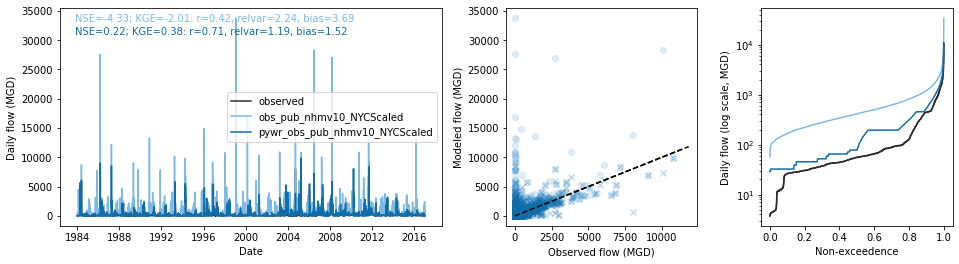

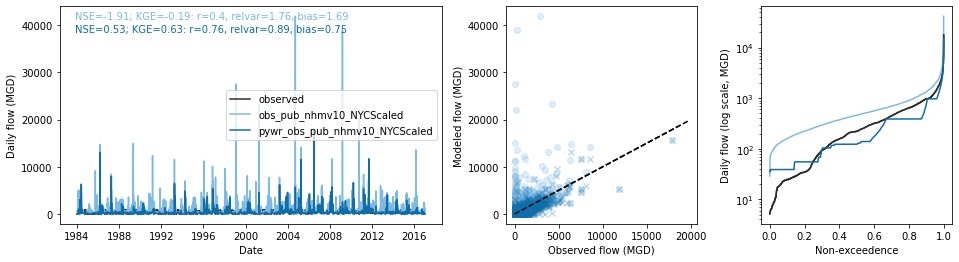

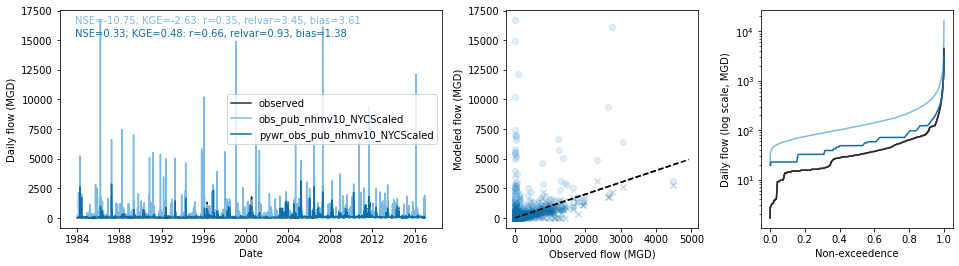

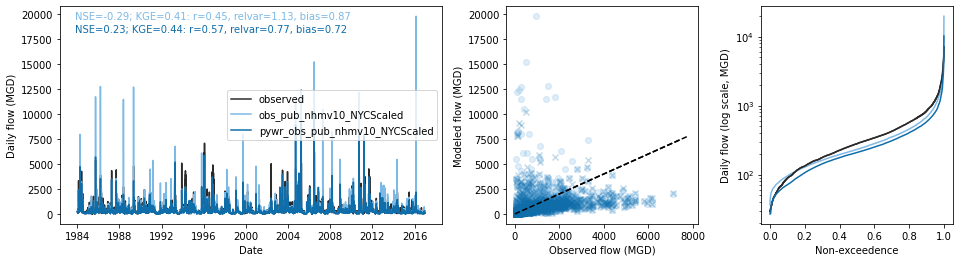

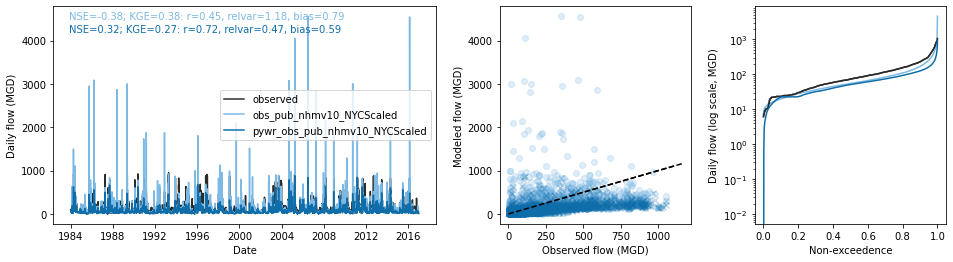

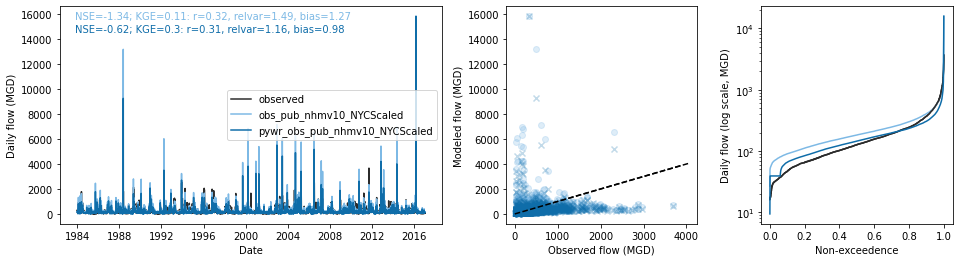

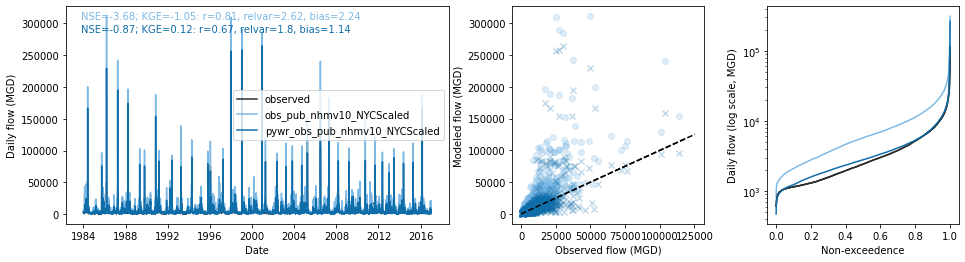

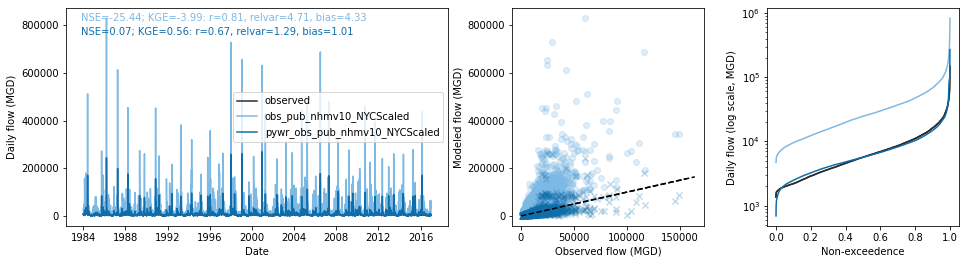

In [12]:
### flow comparison downstream of reservoirs - pub based on nhmv10
plot_3part_flows(reservoir_downstream_gages, ['obs_pub_nhmv10_NYCScaled', 'pywr_obs_pub_nhmv10_NYCScaled'], 'pepacton', save_fig=False)
plot_3part_flows(reservoir_downstream_gages, ['obs_pub_nhmv10_NYCScaled', 'pywr_obs_pub_nhmv10_NYCScaled'], 'cannonsville', save_fig=False)
plot_3part_flows(reservoir_downstream_gages, ['obs_pub_nhmv10_NYCScaled', 'pywr_obs_pub_nhmv10_NYCScaled'], 'neversink', save_fig=False)
plot_3part_flows(reservoir_downstream_gages, ['obs_pub_nhmv10_NYCScaled', 'pywr_obs_pub_nhmv10_NYCScaled'], 'fewalter', save_fig=False)
plot_3part_flows(reservoir_downstream_gages, ['obs_pub_nhmv10_NYCScaled', 'pywr_obs_pub_nhmv10_NYCScaled'], 'beltzvilleCombined', save_fig=False)
plot_3part_flows(reservoir_downstream_gages, ['obs_pub_nhmv10_NYCScaled', 'pywr_obs_pub_nhmv10_NYCScaled'], 'blueMarsh', save_fig=False)
plot_3part_flows(major_flows, ['obs_pub_nhmv10_NYCScaled', 'pywr_obs_pub_nhmv10_NYCScaled'], 'delMontague', save_fig=False)
plot_3part_flows(major_flows, ['obs_pub_nhmv10_NYCScaled', 'pywr_obs_pub_nhmv10_NYCScaled'], 'delTrenton', save_fig=False)

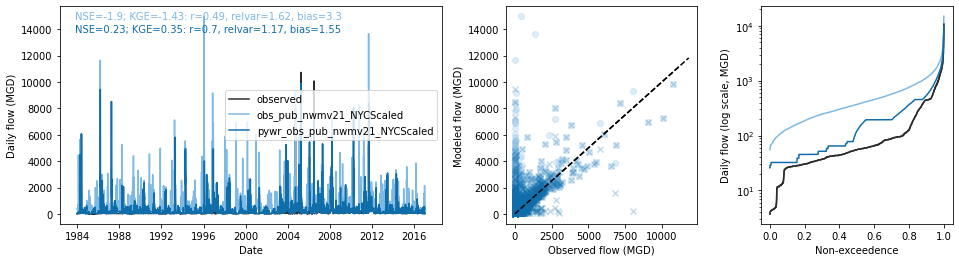

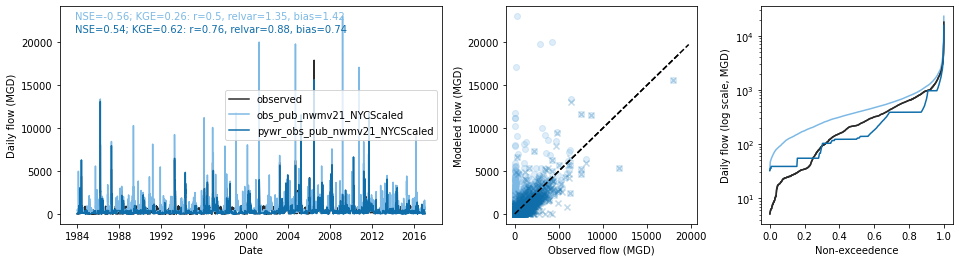

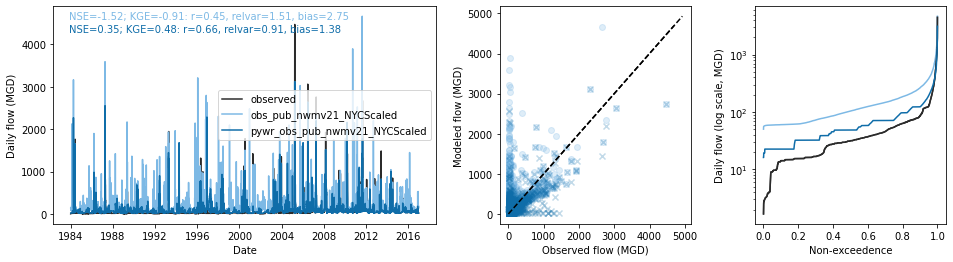

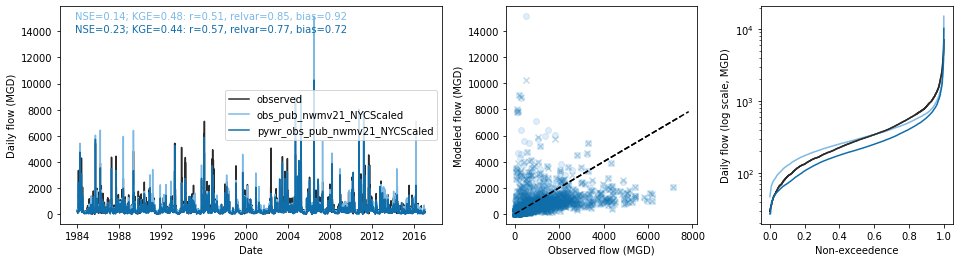

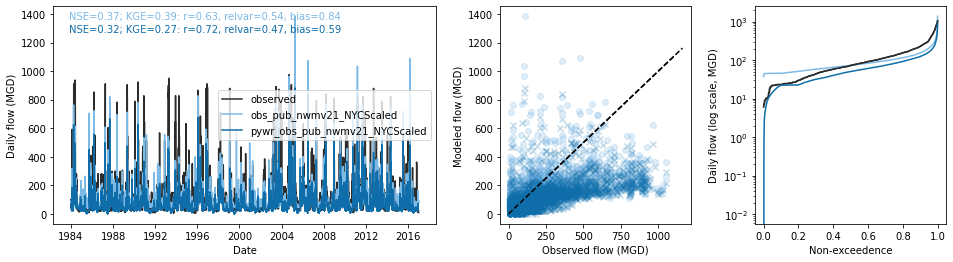

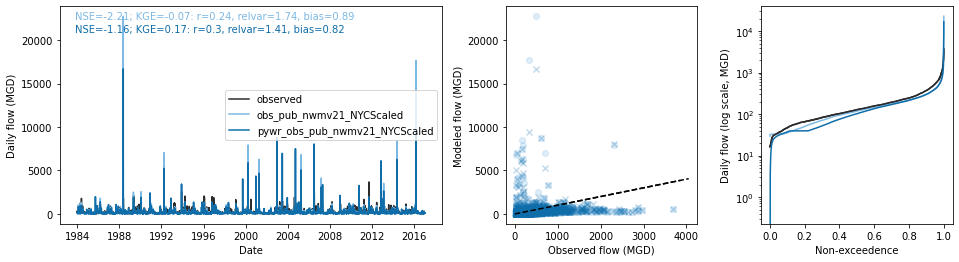

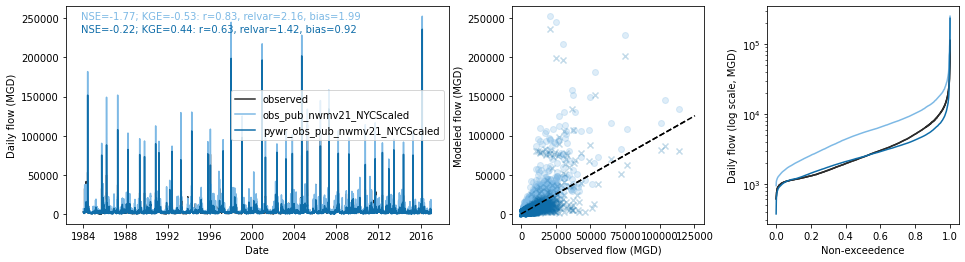

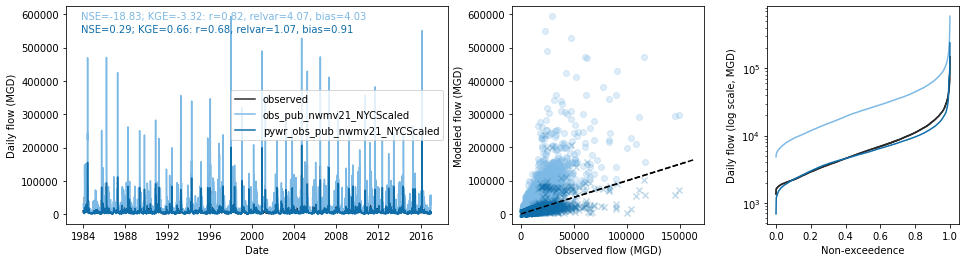

In [11]:
### flow comparison downstream of reservoirs - pub based on nwmv21
plot_3part_flows(reservoir_downstream_gages, ['obs_pub_nwmv21_NYCScaled', 'pywr_obs_pub_nwmv21_NYCScaled'], 'pepacton', save_fig=False)
plot_3part_flows(reservoir_downstream_gages, ['obs_pub_nwmv21_NYCScaled', 'pywr_obs_pub_nwmv21_NYCScaled'], 'cannonsville', save_fig=False)
plot_3part_flows(reservoir_downstream_gages, ['obs_pub_nwmv21_NYCScaled', 'pywr_obs_pub_nwmv21_NYCScaled'], 'neversink', save_fig=False)
plot_3part_flows(reservoir_downstream_gages, ['obs_pub_nwmv21_NYCScaled', 'pywr_obs_pub_nwmv21_NYCScaled'], 'fewalter', save_fig=False)
plot_3part_flows(reservoir_downstream_gages, ['obs_pub_nwmv21_NYCScaled', 'pywr_obs_pub_nwmv21_NYCScaled'], 'beltzvilleCombined', save_fig=False)
plot_3part_flows(reservoir_downstream_gages, ['obs_pub_nwmv21_NYCScaled', 'pywr_obs_pub_nwmv21_NYCScaled'], 'blueMarsh', save_fig=False)
plot_3part_flows(major_flows, ['obs_pub_nwmv21_NYCScaled', 'pywr_obs_pub_nwmv21_NYCScaled'], 'delMontague', save_fig=False)
plot_3part_flows(major_flows, ['obs_pub_nwmv21_NYCScaled', 'pywr_obs_pub_nwmv21_NYCScaled'], 'delTrenton', save_fig=False)

### performance during drought periods

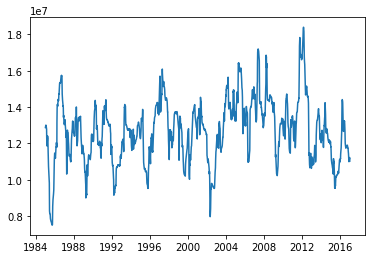

In [13]:
annflow = major_flows['obs_pub_nhmv10_NYCScaled']['delTrenton'].rolling(365).sum()
plt.plot(annflow)

### low-flow metrics

In [14]:
### get 7q10 flow for each estimate
def get_xQn_flow(data, x, n):
    ### find the worst x-day rolling average each year, then get the value of this with n-year return interval
    data_rolling = data.rolling(x).mean()[x:]
    data_rolling_annualWorst = data_rolling.resample('A').min()
    xQn = np.percentile(data_rolling_annualWorst, 100/n)
    return xQn
    
xlist = [1,7,30,90, 365]
nlist = [5, 10, 20, 30]
flow_metrics = {}
for x in xlist:
    for n in nlist:
        flow_metrics[f'{x}Q{n}'] = {}
        for reservoir in reservoir_list_nyc + ['beltzvilleCombined', 'blueMarsh', 'fewalter']:
            flow_metrics[f'{x}Q{n}'][reservoir] = {model: get_xQn_flow(reservoir_downstream_gages[model][reservoir], x, n) for model in pywr_models+base_models}
        for major in majorflow_list:
            flow_metrics[f'{x}Q{n}'][major] = {model: get_xQn_flow(major_flows[model][major], x, n) for model in pywr_models+base_models}    
    
# flow_metrics

In [15]:
major_flows['obs']['delTrenton'].rolling(365).mean()[365:].resample('A').min()

1984-12-31     8802.246829
1985-12-31     3802.096025
1986-12-31     5616.280109
1987-12-31     6669.163337
1988-12-31     5682.510203
1989-12-31     4814.455145
1990-12-31     7479.981855
1991-12-31     5540.560753
1992-12-31     4357.660468
1993-12-31     6089.220695
1994-12-31     7915.620434
1995-12-31     5429.079624
1996-12-31     5607.251147
1997-12-31     6024.601651
1998-12-31     5920.184358
1999-12-31     4573.753633
2000-12-31     5208.772944
2001-12-31     5231.327646
2002-12-31     3657.597221
2003-12-31     6403.180730
2004-12-31    10217.970414
2005-12-31     9718.898948
2006-12-31     7982.540979
2007-12-31     8063.960974
2008-12-31     8354.073925
2009-12-31     6739.164350
2010-12-31     8012.248035
2011-12-31     7581.070825
2012-12-31     6284.228577
2013-12-31     6170.127279
2014-12-31     6589.584542
2015-12-31     5030.034898
2016-12-31     5013.163131
Freq: A-DEC, Name: delTrenton, dtype: float64

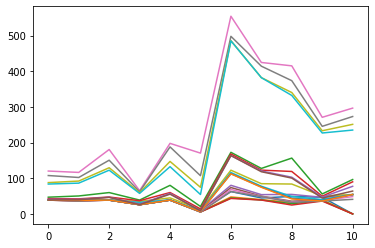

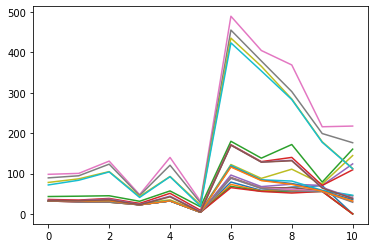

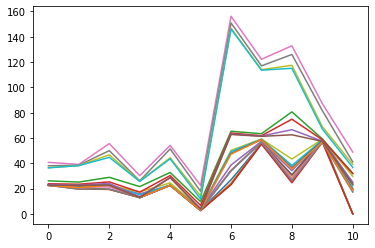

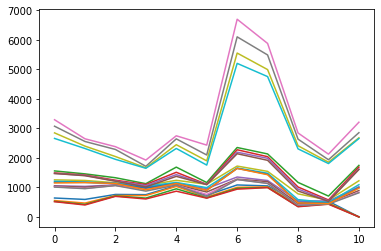

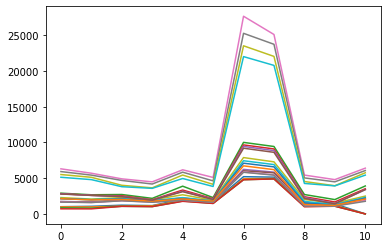

In [16]:
for node in ['cannonsville', 'pepacton', 'neversink', 'delMontague', 'delTrenton']:
    plt.figure()
    for x in xlist:
        for n in nlist:
            plt.plot(flow_metrics[f'{x}Q{n}'][node].values())

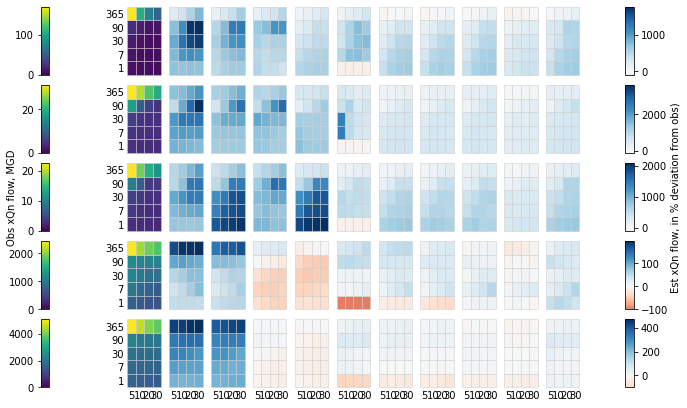

In [18]:
### plot low flow metric grid
models = base_models + pywr_models

nodes = ['cannonsville', 'pepacton', 'neversink', 'delMontague', 'delTrenton']

fig, axs = plt.subplots(len(nodes),1,figsize=(14,7),gridspec_kw={'hspace':0.15})

for ax,node in zip(axs, nodes):
    a = np.zeros((len(nlist),len(xlist), len(models)))
    for i, model in enumerate(models):
        count = 0
        for nn, n in enumerate(nlist):
            for xx,x in enumerate(xlist):
                if node in reservoir_list:
                    a[nn,xx, i] = get_xQn_flow(reservoir_downstream_gages[model][node], x, n)
                elif node in majorflow_list:
                    a[nn,xx, i] = get_xQn_flow(major_flows[model][node], x, n)
                count += 1
    for c in range(1, len(models)):
        a[:,:,c] = (a[:,:,c] - a[:, :, 0]) / a[:,:,0] * 100
                
    cnorm_obs = Normalize(vmin=0, vmax=a[:,:,0].max())
    sm_obs = cm.ScalarMappable(cmap='viridis', norm=cnorm_obs)
    cnorm_mod = Normalize(vmin=-a[:,:,1:].max(), vmax=a[:,:,1:].max())
    sm_mod = cm.ScalarMappable(cmap='RdBu', norm=cnorm_mod)
#     cnorm_mod = Normalize(vmin=-1000, vmax=1000)
#     sm_mod = cm.ScalarMappable(cmap='RdBu', norm=cnorm_mod)
    xmax = 0
    for i, model in enumerate(models):
        for nn, n in enumerate(nlist):
            for xx,x in enumerate(xlist):
                box = [Rectangle((nn+xmax,xx),1,1)]
                if i == 0:
                    color = sm_obs.to_rgba(a[nn,xx,i])
                else:
                    color = sm_mod.to_rgba(a[nn,xx,i])                    
                pc = PatchCollection(box, facecolor = color, edgecolor='0.8', lw=0.5)
                ax.add_collection(pc)
        xmax += xx+1
    ax.spines[['right','left','bottom', 'top']].set_visible(False)
    ax.set_xlim([0, xmax+1])
    ax.set_ylim([0, xx+1])
    if node == nodes[-1]:
        ax.set_xticks([v-0.5 for v in range(xmax) if v%(len(nlist)+1) > 0], nlist*len(models))
    else:
        ax.set_xticks([])
    ax.set_yticks(np.arange(0.5, xx+1), xlist)
    ax.tick_params(axis='both', which='both',length=0)
    if node == nodes[2]:
        fig.colorbar(sm_obs, ax=ax, location='left', aspect=8, label='Obs xQn flow, MGD')
        cb = fig.colorbar(sm_mod, ax=ax, location='right', aspect=8, label='Est xQn flow, in % deviation from obs)')
    else:
        fig.colorbar(sm_obs, ax=ax, location='left', aspect=8)
        cb = fig.colorbar(sm_mod, ax=ax, location='right', aspect=8)
    cb.ax.set_ylim([max(-100, -a[:,:,1:].max()),a[:,:,1:].max()])
#     cb.ax.set_ylim([-100,1000])
    
        

#     if node == 'cannonsville':
#         print(a)

In [19]:
print(models)

['obs', 'obs_pub_nhmv10_NYCScaled', 'obs_pub_nwmv21_NYCScaled', 'nhmv10', 'nwmv21', 'WEAP_29June2023_gridmet', 'pywr_obs_pub_nhmv10_NYCScaled', 'pywr_obs_pub_nwmv21_NYCScaled', 'pywr_nhmv10', 'pywr_nwmv21', 'pywr_WEAP_29June2023_gridmet']


### analyze reservoir storages

In [20]:
### load catchment withdrawal/consumption data

start_date = '1983-10-01'
end_date = '2017-01-01'

    
pywr_models = ['obs_pub_nhmv10_NYCScaled','obs_pub_nwmv21_NYCScaled','WEAP_29June2023_gridmet', 'nhmv10', 'nwmv21']
res_storages = {}
res_levels = {}
res_releases = {}

for model in pywr_models:
    res_storages[f'pywr_{model}'], datetime_index = get_pywr_results(output_dir, model, 'res_storage', datetime_index=datetime_index)
    res_storages[f'pywr_{model}'] = res_storages[f'pywr_{model}'].loc[start_date:end_date,:]
    res_levels[f'pywr_{model}'], datetime_index = get_pywr_results(output_dir, model, 'res_level', datetime_index=datetime_index)
    res_levels[f'pywr_{model}'] = res_levels[f'pywr_{model}'].loc[start_date:end_date,:]
    res_releases[f'pywr_{model}'], datetime_index = get_pywr_results(output_dir, model, 'res_release', datetime_index=datetime_index)
    res_releases[f'pywr_{model}'] = res_releases[f'pywr_{model}'].loc[start_date:end_date,:]
    

pywr_models = [f'pywr_{m}' for m in pywr_models]

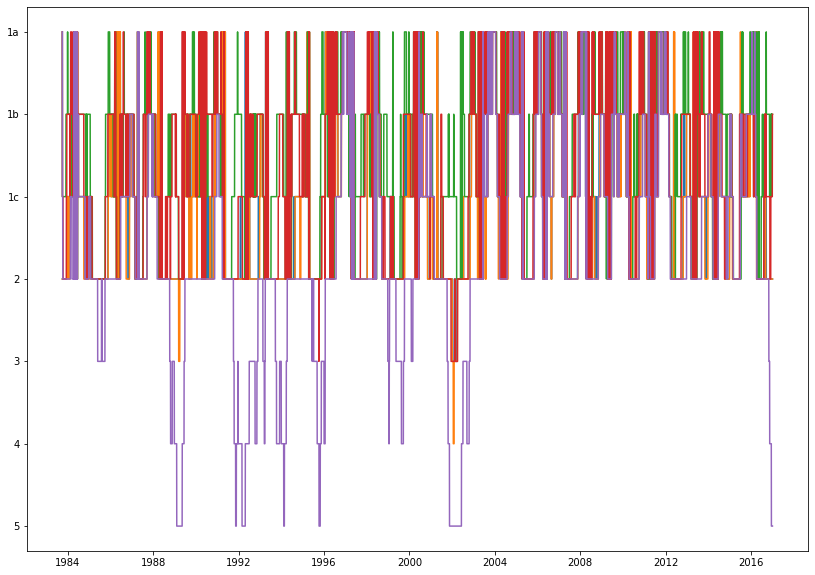

In [21]:
levels = ['1a','1b','1c','2','3','4','5']
plt.figure(figsize=(14,10))
for model in pywr_models:
    plt.plot(-res_levels[model]['nyc'])
_ = plt.yticks(range(0,-7, -1), levels)

In [23]:
### get historical NYC storages
hist_storages = pd.read_csv(f'{input_dir}/historic_NYC/NYC_storage_daily_2000-2021.csv', index_col=0)
hist_storages.index = pd.DatetimeIndex(hist_storages.index)

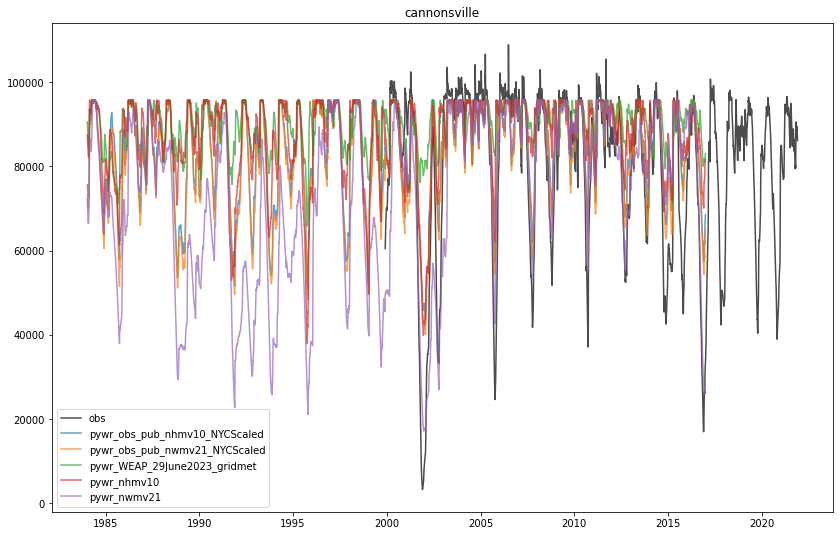

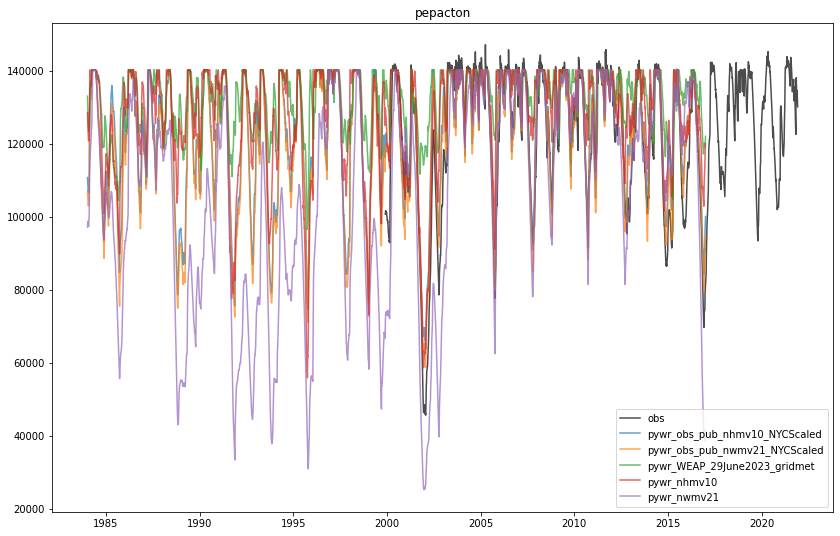

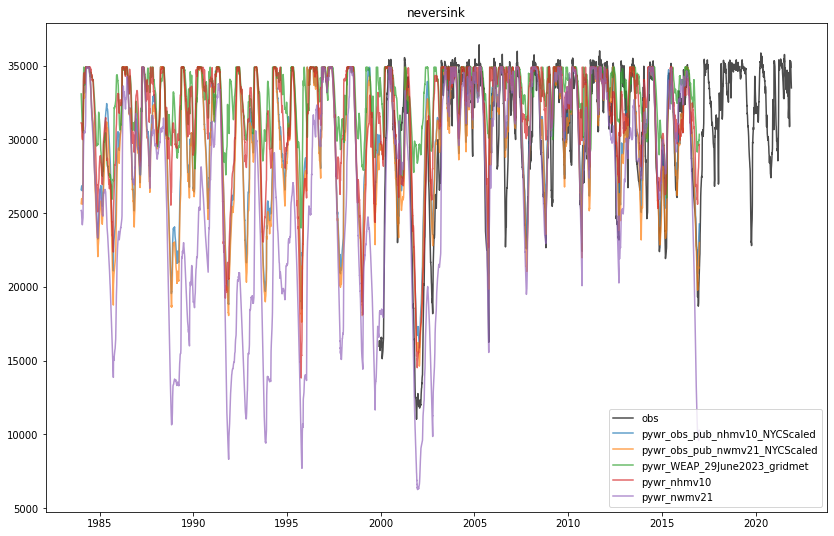

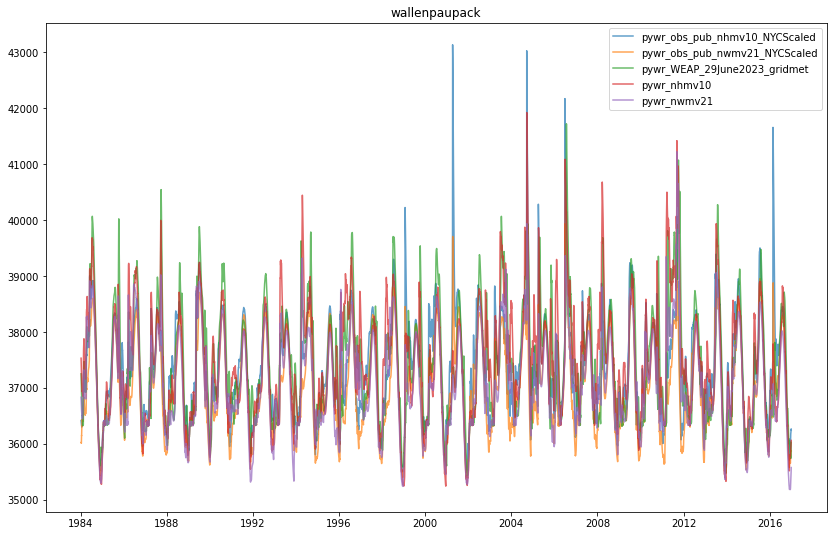

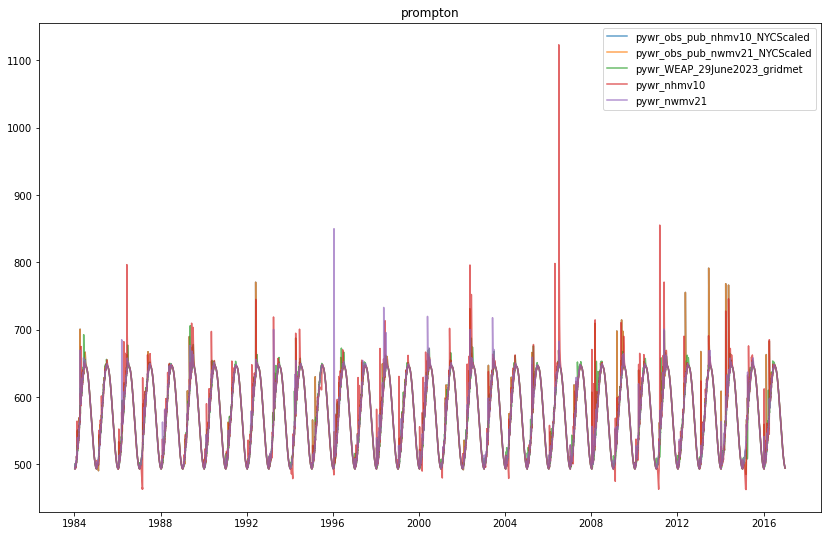

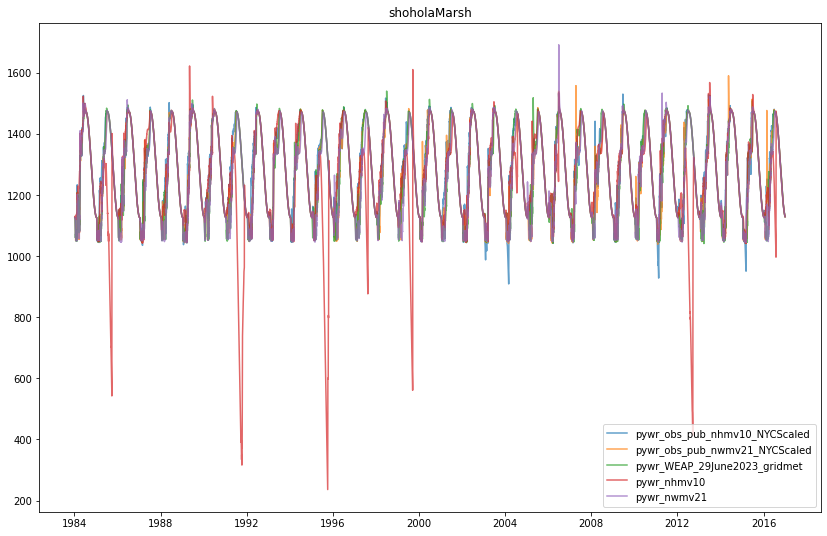

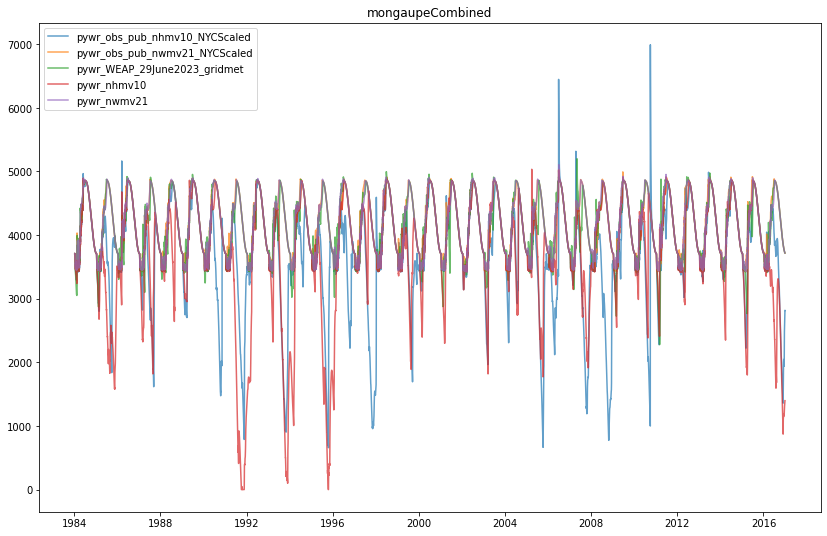

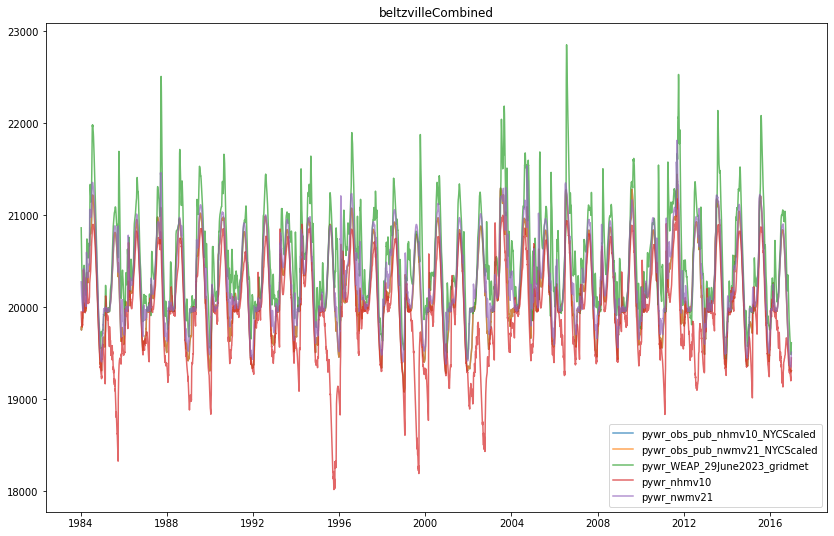

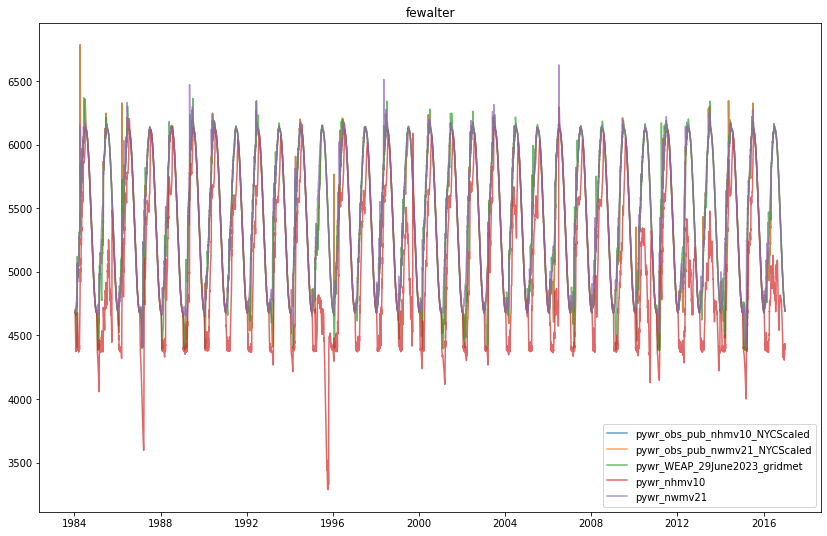

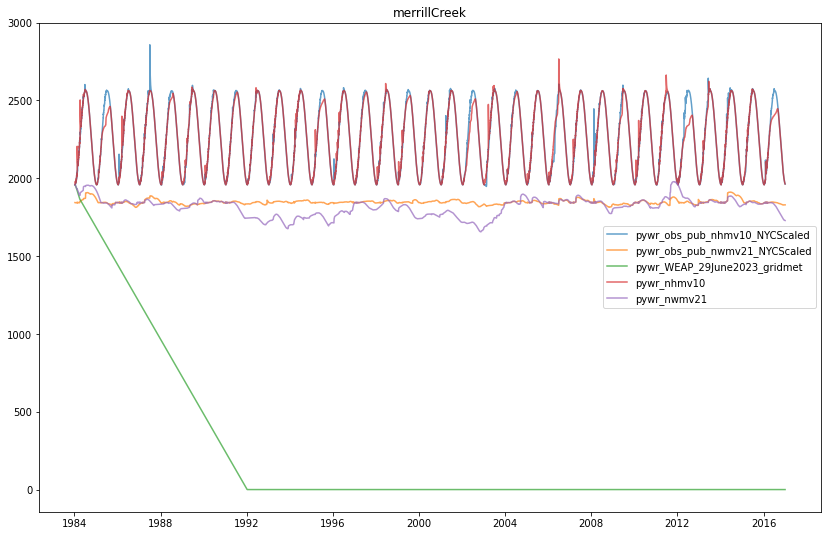

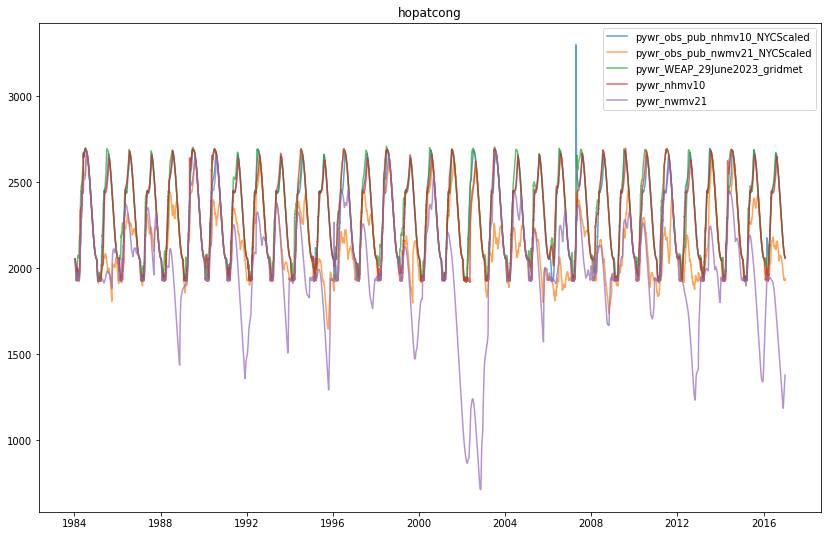

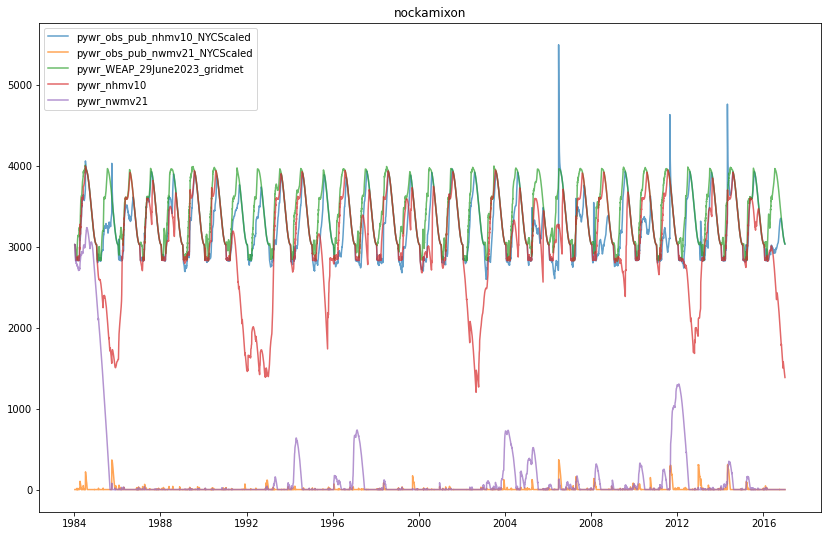

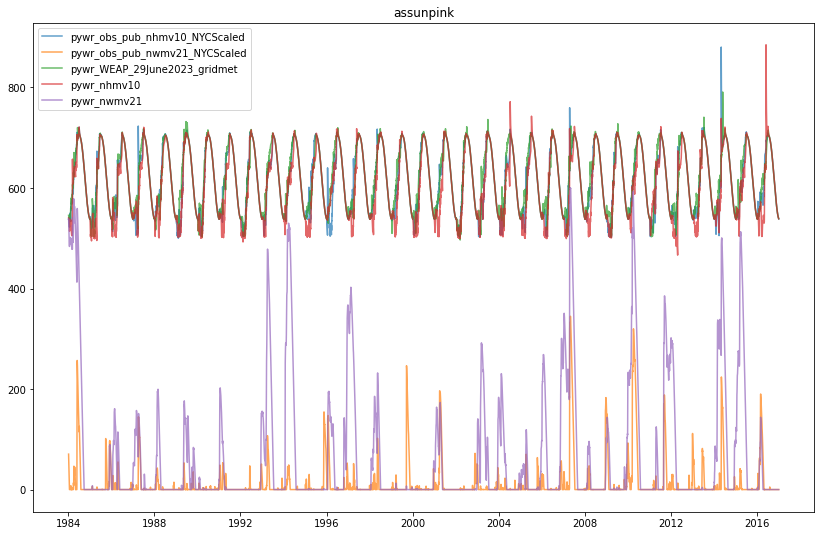

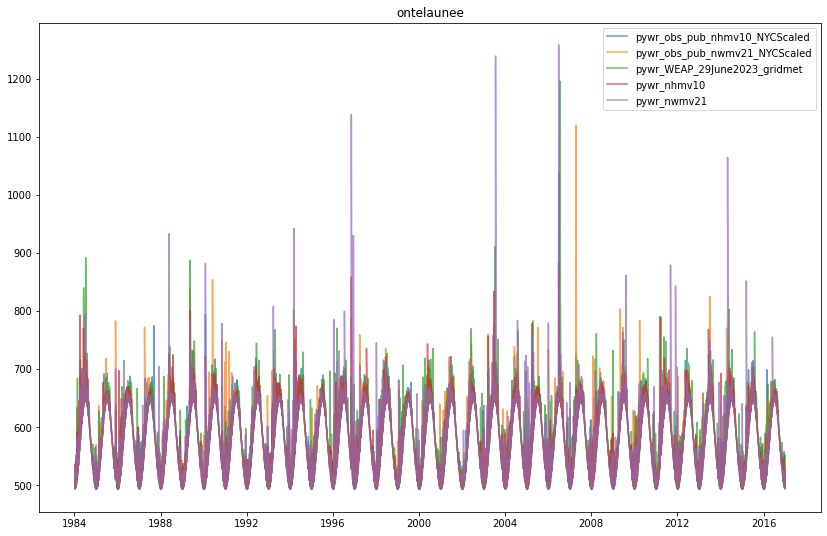

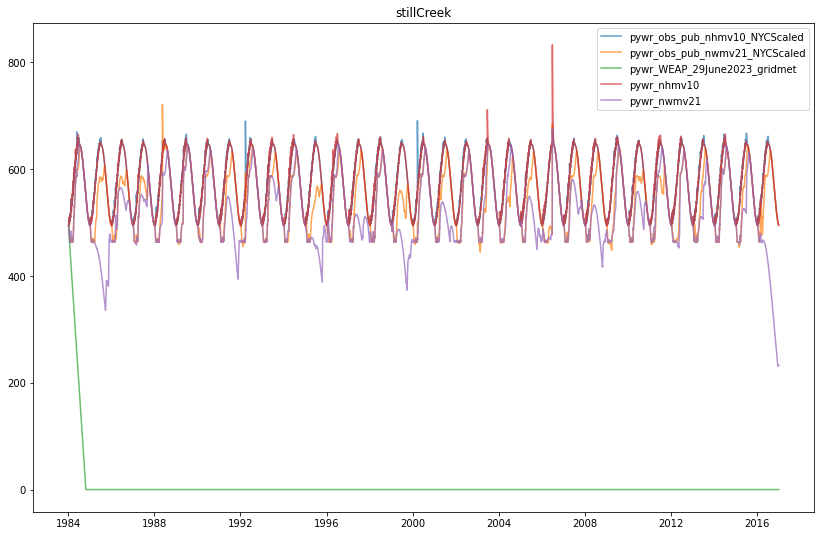

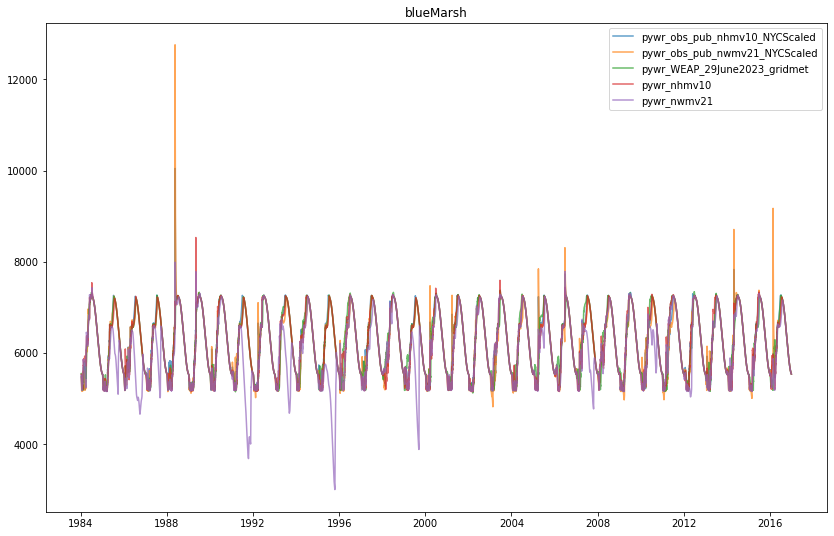

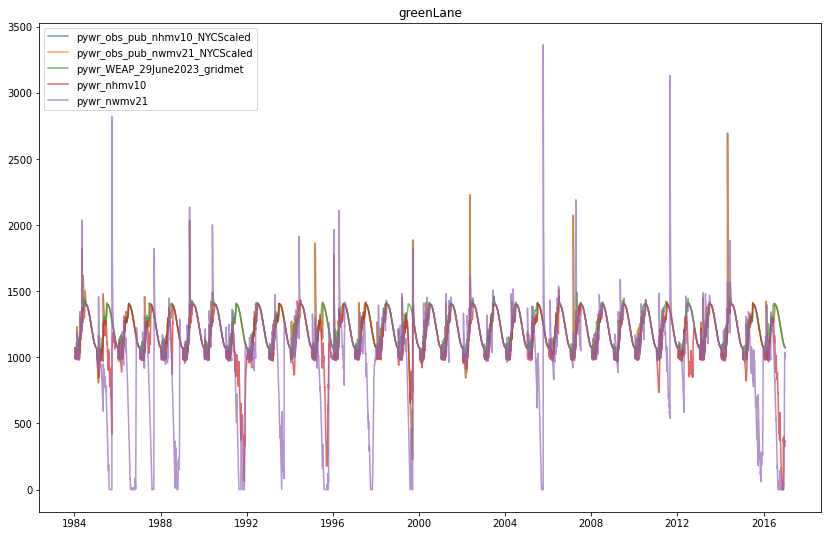

In [24]:
for reservoir in reservoir_list:
    plt.subplots(figsize=(14,9))
    if reservoir in reservoir_list_nyc:
        plt.plot(hist_storages[reservoir], color='k', label='obs', alpha=0.7)
    for model in pywr_models:
        plt.plot(res_storages[model][reservoir].iloc[100:], label=model, alpha=0.7)

    plt.legend()
    plt.title(reservoir)

/tmp/ipykernel_25485/468636728.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  start_date = pd.datetime(2001, 1,1)
/tmp/ipykernel_25485/468636728.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  end_date = pd.datetime(2004, 1,1)


Text(0, 0.5, 'Storage level')

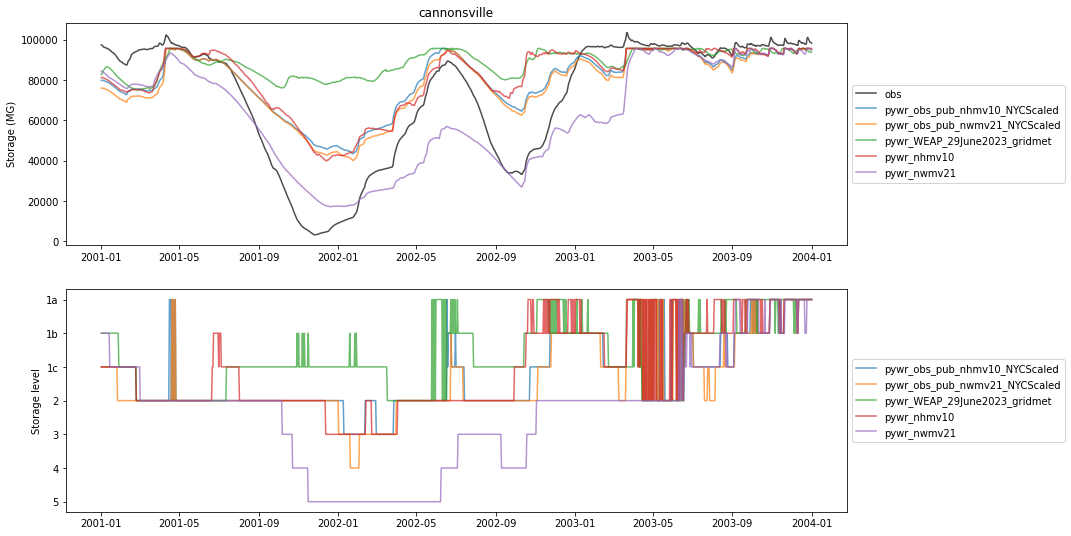

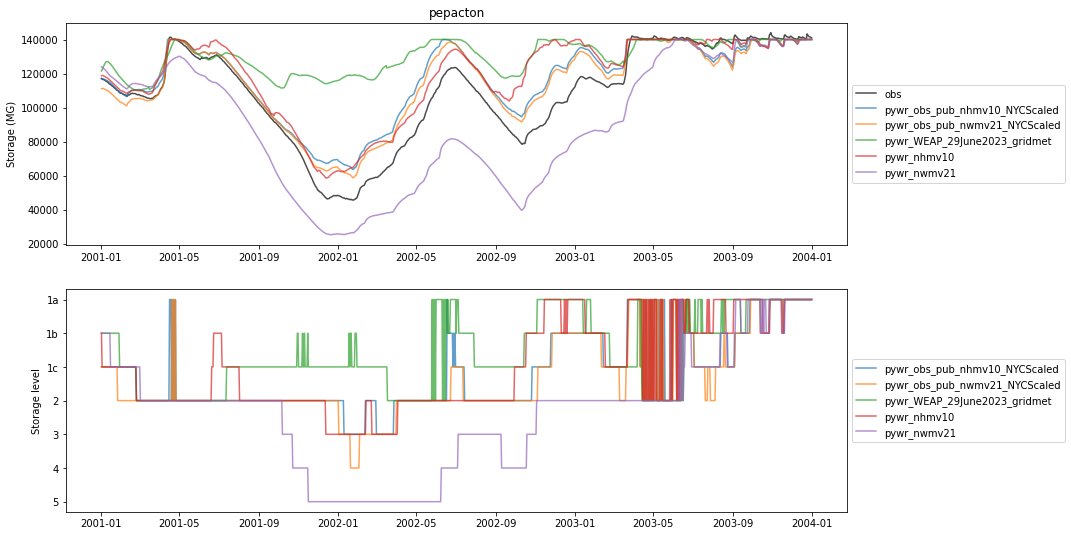

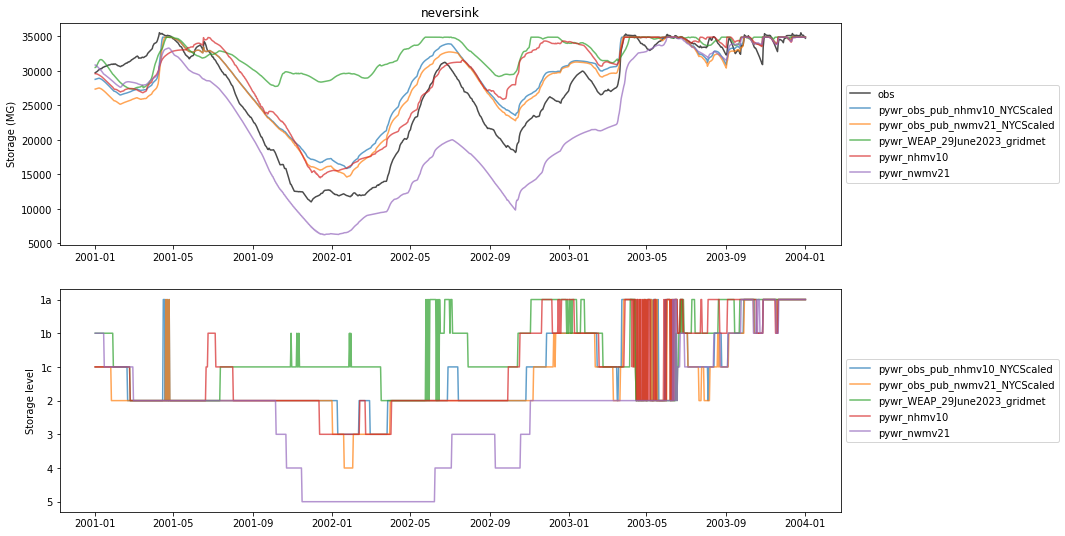

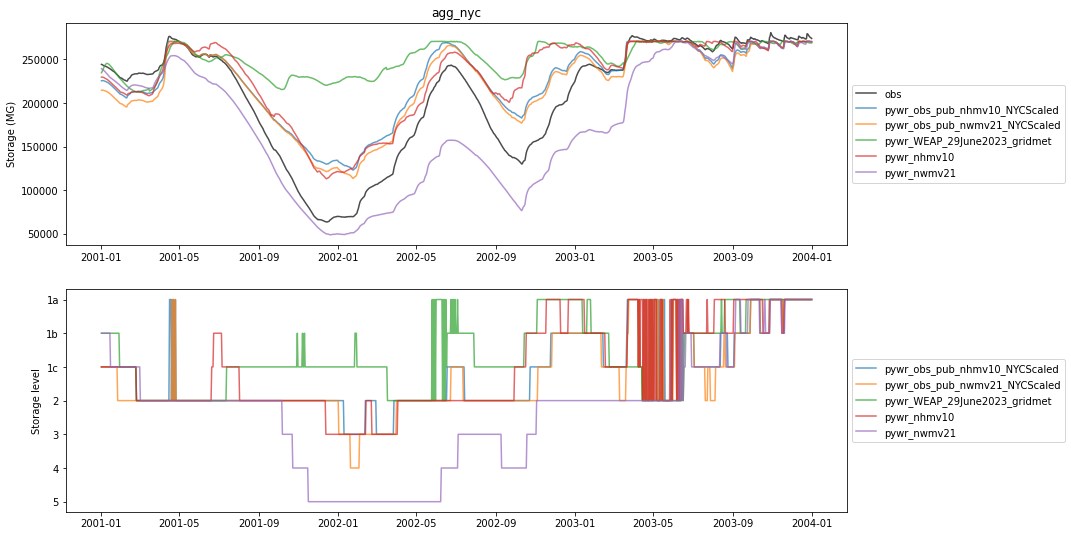

In [25]:
### zoom in on dry period 2001-2004
start_date = pd.datetime(2001, 1,1)
end_date = pd.datetime(2004, 1,1)

for reservoir in reservoir_list_nyc:
    fig, axs = plt.subplots(2,1,figsize=(14,9))
    ax = axs[0]
    ax.plot(hist_storages[reservoir].loc[start_date:end_date], color='k', label='obs', alpha=0.7)
    for model in pywr_models:
        ax.plot(res_storages[model][reservoir].loc[start_date:end_date], label=model, alpha=0.7)
    ax.legend(loc='center left', bbox_to_anchor = (1,0.5))
    ax.set_title(reservoir)
    ax.set_ylabel('Storage (MG)')
    
    ax = axs[1]
    for model in pywr_models:
        ### use individual level when agg_nyc level is 1a-1c
        final_level = res_levels[model]['nyc'].copy()
        final_level.loc[final_level < 3] = res_levels[model][reservoir].loc[final_level < 3]
        ax.plot(-final_level.loc[start_date:end_date], label=model, alpha=0.7)
    ax.set_yticks(range(0,-7, -1), levels)
    ax.legend(loc='center left', bbox_to_anchor = (1,0.5))
    ax.set_ylabel('Storage level')
    
### now do agg nyc
fig, axs = plt.subplots(2,1,figsize=(14,9))
ax = axs[0]
agg_storage = hist_storages['cannonsville'].loc[start_date:end_date] + hist_storages['pepacton'].loc[start_date:end_date] + hist_storages['neversink'].loc[start_date:end_date]
ax.plot(agg_storage, color='k', label='obs', alpha=0.7)
for model in pywr_models:
    agg_storage = res_storages[model]['cannonsville'].loc[start_date:end_date] + res_storages[model]['pepacton'].loc[start_date:end_date] + res_storages[model]['neversink'].loc[start_date:end_date]
    ax.plot(agg_storage, label=model, alpha=0.7)
ax.legend(loc='center left', bbox_to_anchor = (1,0.5))
ax.set_title('agg_nyc')
ax.set_ylabel('Storage (MG)')

ax = axs[1]
for model in pywr_models:
    final_level = res_levels[model]['nyc'].copy()
    ax.plot(-final_level.loc[start_date:end_date], label=model, alpha=0.7)
ax.set_yticks(range(0,-7, -1), levels)
ax.legend(loc='center left', bbox_to_anchor = (1,0.5))
ax.set_ylabel('Storage level')

Text(0, 0.5, 'Storage level')

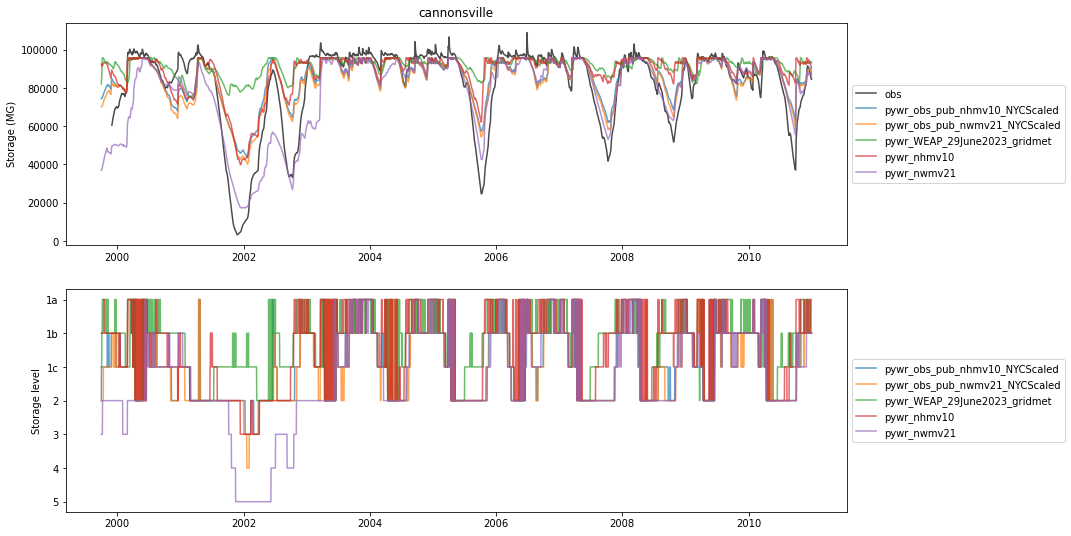

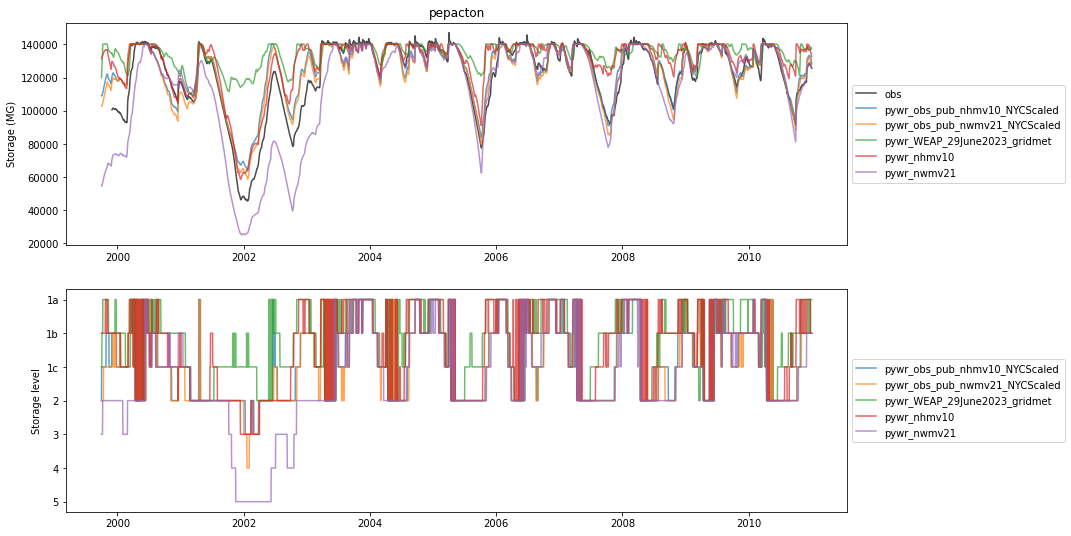

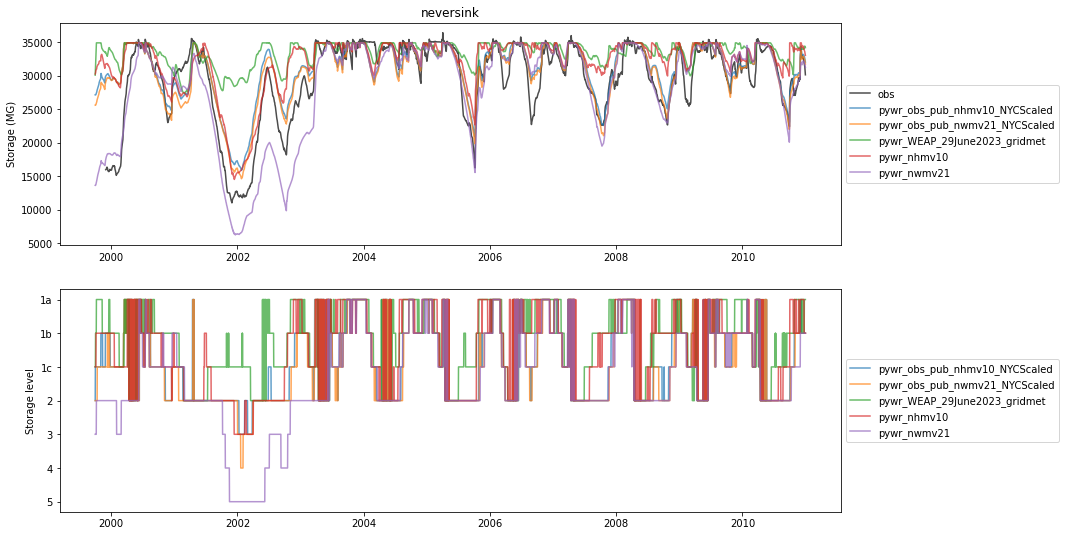

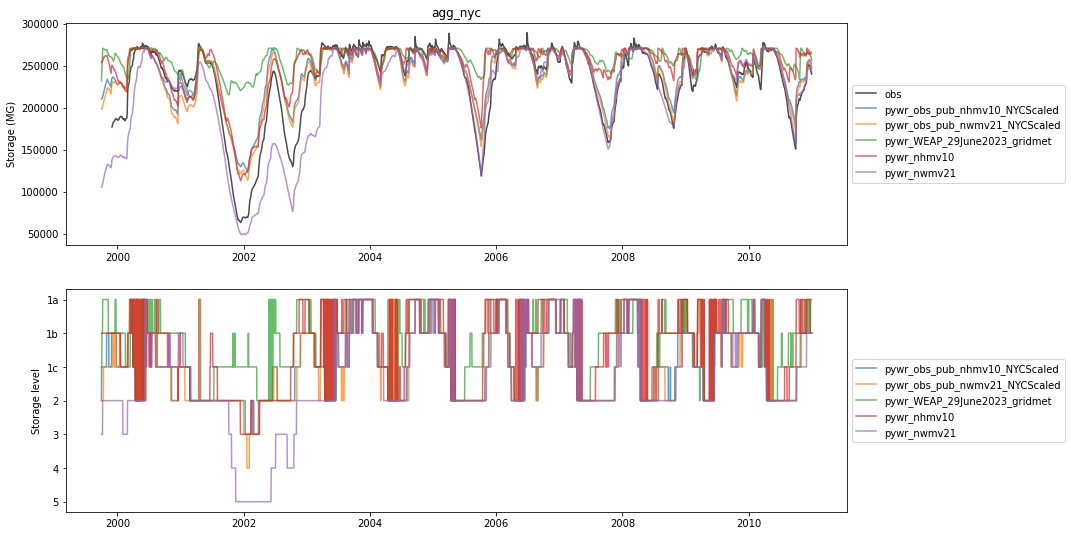

In [26]:
# if use_WEAP:
#     start_date = '1999-06-01'
#     end_date = '2010-05-31'
# else:
#     start_date = '1983-10-01'
#     end_date = '2017-01-01'

start_date = '1999-10-01'
end_date = '2010-12-31'

for reservoir in reservoir_list_nyc:
    fig, axs = plt.subplots(2,1,figsize=(14,9))
    ax = axs[0]
    ax.plot(hist_storages[reservoir].loc[start_date:end_date], color='k', label='obs', alpha=0.7)
    for model in pywr_models:
        ax.plot(res_storages[model][reservoir].loc[start_date:end_date], label=model, alpha=0.7)
    ax.legend(loc='center left', bbox_to_anchor = (1,0.5))
    ax.set_title(reservoir)
    ax.set_ylabel('Storage (MG)')
    
    ax = axs[1]
    for model in pywr_models:
        ### use individual level when agg_nyc level is 1a-1c
        final_level = res_levels[model]['nyc'].copy()
        final_level.loc[final_level < 3] = res_levels[model][reservoir].loc[final_level < 3]
        ax.plot(-final_level.loc[start_date:end_date], label=model, alpha=0.7)
    ax.set_yticks(range(0,-7, -1), levels)
    ax.legend(loc='center left', bbox_to_anchor = (1,0.5))
    ax.set_ylabel('Storage level')
    
### now do agg nyc
fig, axs = plt.subplots(2,1,figsize=(14,9))
ax = axs[0]
agg_storage = hist_storages['cannonsville'].loc[start_date:end_date] + hist_storages['pepacton'].loc[start_date:end_date] + hist_storages['neversink'].loc[start_date:end_date]
ax.plot(agg_storage, color='k', label='obs', alpha=0.7)
for model in pywr_models:
    agg_storage = res_storages[model]['cannonsville'].loc[start_date:end_date] + res_storages[model]['pepacton'].loc[start_date:end_date] + res_storages[model]['neversink'].loc[start_date:end_date]
    ax.plot(agg_storage, label=model, alpha=0.7)
ax.legend(loc='center left', bbox_to_anchor = (1,0.5))
ax.set_title('agg_nyc')
ax.set_ylabel('Storage (MG)')

ax = axs[1]
for model in pywr_models:
    final_level = res_levels[model]['nyc'].copy()
    ax.plot(-final_level.loc[start_date:end_date], label=model, alpha=0.7)
ax.set_yticks(range(0,-7, -1), levels)
ax.legend(loc='center left', bbox_to_anchor = (1,0.5))
ax.set_ylabel('Storage level')

In [29]:
pywr_models = ['obs_pub_nhmv10_NYCScaled','obs_pub_nwmv21_NYCScaled','WEAP_29June2023_gridmet', 'nhmv10', 'nwmv21']


minflows = {}


for model in pywr_models:
    minflows[f'pywr_{model}'], datetime_index = get_pywr_results(output_dir, model, 'mrf_target', datetime_index=datetime_index)
    minflows[f'pywr_{model}'] = minflows[f'pywr_{model}'].loc[start_date:end_date,:]
    
pywr_models = [f'pywr_{m}' for m in pywr_models]

cannonsville: 0.0
pepacton: 0.0
neversink: 0.0


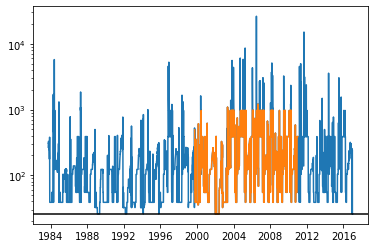

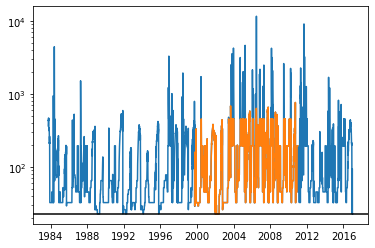

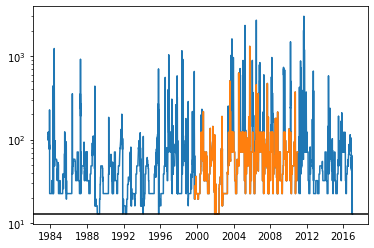

In [30]:
### compare reservoir releases to mandated minimums
model = 'pywr_nwmv21'
min_ffmp_dict = {'cannonsville': 40 * cfs_to_mgd, 'pepacton': 35 * cfs_to_mgd, 'neversink': 20 * cfs_to_mgd}
for r in reservoir_list_nyc:
    plt.figure()
    plt.plot(res_releases[model][r])
    plt.plot(minflows[model][r])
    plt.axhline(min_ffmp_dict[r], color='k')
    plt.yscale('log')
    print(f'{r}: {(res_releases[model][r] < min_ffmp_dict[r]).mean() }')
    


In [32]:
### redo Trev's reservoir storage fig
## Load data    
# Load Pywr-DRB simulation models
print(f'Retrieving simulation data from {start_date} to {end_date}.')

pywr_models = ['obs_pub_nhmv10_NYCScaled','obs_pub_nwmv21_NYCScaled','WEAP_29June2023_gridmet', 'nhmv10', 'nwmv21']


reservoir_downstream_gages = {}
major_flows = {}
storages = {}

for model in pywr_models:
    reservoir_downstream_gages[f'pywr_{model}'], datetime_index = get_pywr_results(output_dir, model, 'reservoir_downstream_gage', datetime_index=datetime_index)
    reservoir_downstream_gages[f'pywr_{model}'] = reservoir_downstream_gages[f'pywr_{model}'].loc[start_date:end_date,:]
    major_flows[f'pywr_{model}'], datetime_index = get_pywr_results(output_dir, model, 'major_flow', datetime_index=datetime_index)
    major_flows[f'pywr_{model}'] = major_flows[f'pywr_{model}'].loc[start_date:end_date,:]
    storages[f'pywr_{model}'], datetime_index = get_pywr_results(output_dir, model, 'res_storage', datetime_index=datetime_index)

pywr_models = [f'pywr_{m}' for m in pywr_models]

# Load base (non-pywr) models
pywr_models = ['obs_pub_nhmv10_NYCScaled','obs_pub_nwmv21_NYCScaled','WEAP_29June2023_gridmet', 'nhmv10', 'nwmv21']
base_models = ['obs_pub_nhmv10_NYCScaled','obs_pub_nwmv21_NYCScaled','WEAP_29June2023_gridmet', 'nhmv10', 'nwmv21']


datetime_index = list(reservoir_downstream_gages.values())[0].index
for model in base_models:
    reservoir_downstream_gages[model] = get_base_results(input_dir, model, datetime_index, 'reservoir_downstream_gage').loc[start_date:end_date,:]
    major_flows[model] = get_base_results(input_dir, model, datetime_index, 'major_flow').loc[start_date:end_date,:]


plot_combined_nyc_storage(storages, reservoir_downstream_gages, pywr_models, start_date='2000-01-01', end_date='2004-01-01')

Retrieving simulation data from 1999-10-01 to 2010-12-31.


KeyError: 'obs_pub_nhmv10_NYCScaled'

In [ ]:
### redo Trev's reservoir storage fig
## Load data    
# Load Pywr-DRB simulation models
print(f'Retrieving simulation data from {start_date} to {end_date}.')
if use_WEAP:
    pywr_models = ['obs_pub', 'nhmv10', 'nwmv21', 'WEAP_23Aug2022_gridmet_nhmv10']
else:
    pywr_models = ['obs_pub', 'nhmv10', 'nwmv21']

reservoir_downstream_gages = {}
major_flows = {}
storages = {}

for model in pywr_models:
    res_releases[f'pywr_{model}'] = get_pywr_results(output_dir, model, 'res_release').loc[start_date:end_date,:]
    major_flows[f'pywr_{model}'] = get_pywr_results(output_dir, model, 'major_flow').loc[start_date:end_date,:]
    storages[f'pywr_{model}'] = get_pywr_results(output_dir, model, 'res_storage')

pywr_models = [f'pywr_{m}' for m in pywr_models]

# # Load base (non-pywr) models
# if use_WEAP:
#     base_models = ['obs', 'obs_pub', 'nhmv10', 'nwmv21', 'WEAP_23Aug2022_gridmet']
# else:
#     base_models = ['obs', 'obs_pub', 'nhmv10', 'nwmv21']

# datetime_index = list(reservoir_downstream_gages.values())[0].index
# for model in base_models:
#     res_releases[model] = get_base_results(input_dir, model, datetime_index, 'reservoir_downstream_gage').loc[start_date:end_date,:]
#     major_flows[model] = get_base_results(input_dir, model, datetime_index, 'major_flow').loc[start_date:end_date,:]


plot_combined_nyc_storage(storages, res_releases, pywr_models, start_date='2000-01-01', end_date='2004-01-01')

### analyze catchment withdrawals/consumption

In [ ]:
### load catchment withdrawal/consumption data
# if use_WEAP:
#     start_date = '1999-06-01'
#     end_date = '2010-05-31'
# else:
#     start_date = '1983-10-01'
#     end_date = '2017-01-01'

start_date = '1999-10-01'
end_date = '2010-12-31'
    
withdrawals = {}
consumptions = {}

pywr_models = ['obs_pub', 'nhmv10', 'nwmv21']

for model in pywr_models:
    withdrawals[f'pywr_{model}'] = get_pywr_results(output_dir, model, 'withdrawal').loc[start_date:end_date,:]
    withdrawals[f'pywr_{model}']['total'] = withdrawals[f'pywr_{model}'].sum(axis=1)
    consumptions[f'pywr_{model}'] = get_pywr_results(output_dir, model, 'consumption').loc[start_date:end_date,:]
    consumptions[f'pywr_{model}']['total'] = consumptions[f'pywr_{model}'].sum(axis=1)
    
pywr_models = [f'pywr_{m}' for m in pywr_models]



In [ ]:
fig, axs = plt.subplots(1,2, figsize=(12,4))
for m, df in withdrawals.items():
    axs[0].plot(df['total'])
for m, df in consumptions.items():
    axs[1].plot(df['total'])

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(12,4))
for m in withdrawals.keys():
    axs[0].plot(consumptions[m]['total'] / withdrawals[m]['total'])
for m in withdrawals.keys():
    axs[1].plot(consumptions[m]['total'].iloc[1:].values / withdrawals[m]['total'].iloc[:-1].values)

In [ ]:
prev_flows = {}
max_flows = {}

pywr_models = ['obs_pub', 'nhmv10', 'nwmv21']

for model in pywr_models:
    prev_flows[f'pywr_{model}'] = get_pywr_results(output_dir, model, 'prev_flow_catchmentWithdrawal').loc[start_date:end_date,:]
    prev_flows[f'pywr_{model}']['total'] = prev_flows[f'pywr_{model}'].sum(axis=1)
    max_flows[f'pywr_{model}'] = get_pywr_results(output_dir, model, 'max_flow_catchmentConsumption').loc[start_date:end_date,:]
    max_flows[f'pywr_{model}']['total'] = max_flows[f'pywr_{model}'].sum(axis=1)


In [ ]:
fig, axs = plt.subplots(1,2, figsize=(12,4))
for m in withdrawals.keys():
    for c in prev_flows[m].columns:
        if c != 'total':
            axs[0].plot(max_flows[m][c] / prev_flows[m][c])
            axs[1].plot(consumptions[m][c] / prev_flows[m][c])
# for m in withdrawals.keys():
#     axs[1].plot(max_flows[m]['total'].iloc[1:].values / prev_flows[m]['total'].iloc[:-1].values)

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(12,4))
for m in withdrawals.keys():
    axs[0].plot(max_flows[m]['total'] / prev_flows[m]['total'])
    axs[1].plot(consumptions[m]['total'] / prev_flows[m]['total'])
